# NOTE: We will revise pytorch and implement a language model from scratch hopefully this will clear all doubts for future weeks

# Pytorch Basic Session :1 (Do not run this)

In [1]:
#Step 1 : Understanding nn.Module
import torch
import torch.nn as nn

class SimpleModule(nn.Module):
    def __init__(self):
        super().__init__()  #By calling super().__init__(), you're saying: "Hey parent class, set up all your infrastructure before I add my custom stuff."(parent class's constructor.))
        
    def forward(self, x):
        return x

In [2]:
#Setp 1:1 Example
import torch
import torch.nn as nn

class SimpleModule(nn.Module):
    def __init__(self):
        super().__init__()
        
    def forward(self, x):
        return x * 2

# Create model
model = SimpleModule()

# Test it
x = torch.tensor([1.0, 2.0, 3.0])
output = model(x)  # This calls forward() automatically

print(f"Input: {x}")
print(f"Output: {output}")

Input: tensor([1., 2., 3.])
Output: tensor([2., 4., 6.])


In [3]:
#Step 2 :Understanding nn.Parameter
import torch
import torch.nn as nn

class ModuleWithWeight(nn.Module):
    def __init__(self, size):
        super().__init__()
        
        # This creates a LEARNABLE parameter
        self.weight = nn.Parameter(torch.randn(size))
        
    def forward(self, x):
        return x * self.weight

# Create model
model = ModuleWithWeight(3)

# Test
x = torch.tensor([1.0, 2.0, 3.0])
output = model(x)

print(f"Input: {x}")
print(f"Weight: {model.weight}")
print(f"Output: {output}")
print(f"\nIs weight learnable? {model.weight.requires_grad}")

Input: tensor([1., 2., 3.])
Weight: Parameter containing:
tensor([-0.8741,  1.4167,  1.5167], requires_grad=True)
Output: tensor([-0.8741,  2.8334,  4.5501], grad_fn=<MulBackward0>)

Is weight learnable? True


In [4]:
# Step 3 : Understanding nn.Linear
import torch
import torch.nn as nn

# Create a linear layer
input_dim = 512
output_dim = 256
linear = nn.Linear(input_dim, output_dim)

# What does it contain?
print(f"Weight shape: {linear.weight.shape}")
print(f"Bias shape: {linear.bias.shape}")
print(f"Weight requires_grad: {linear.weight.requires_grad}")

Weight shape: torch.Size([256, 512])
Bias shape: torch.Size([256])
Weight requires_grad: True


In [5]:
import torch
import torch.nn as nn

# Create linear layer
linear = nn.Linear(512, 256)
# This creates a weight matrix of 256 and 512

# Create input
batch_size = 32
seq_len = 10
x = torch.randn(batch_size, seq_len, 512)

# Forward pass
output = linear(x)

print(f"Input shape:  {x.shape}")      # [32, 10, 512]
print(f"Output shape: {output.shape}")  # [32, 10, 256]

Input shape:  torch.Size([32, 10, 512])
Output shape: torch.Size([32, 10, 256])


# Buliding Token Embeddings

In [1]:
import torch
import torch.nn as nn

#Start by inheriting from nn.Module
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size, embed_dim):
        super().__init__() #Call the parent class's constructor so that all methods of nn.Module are properly initialized.
        #nn.embedding creates a lookup table that maps from integer indices (representing tokens) to dense vectors of fixed size (the embeddings).
        #nn.embedding ,creates a lookup table and intializes it with random values. and makes the values learnable parameters of the model. (also registers it as a parameter of the module)
        self.embedding = nn.Embedding(vocab_size, embed_dim)
        
    def forward(self, x):
        return self.embedding(x)
    
# #Create
# vocab_size = 1000  # Size of the vocabulary
# d_model = 512    # Dimension of the embeddings
# token_embed= TokenEmbedding(vocab_size, d_model)

# #Test
# token_ids=torch.randint(0, vocab_size, (2,10))
# output= token_embed (token_ids)
# print(f"Input token IDs shape: {token_ids.shape}")  # [2, 10]
# print(f"Output embeddings shape: {output.shape}")    # [2, 10,

# Position embeddings

In [2]:
import torch
import torch.nn as nn

class PositionEmbedding(nn.Module): #Inherit from nn.Module
    def __init__(self, max_seq_len, d_model):
        super().__init__() #Call the parent class's constructor to make sure all methods of nn.Module are properly initialized. and available.
        #NOTE:Transformers (Original paper) used sinusoidal position embeddings, but nn.Embedding is a common choice for learnable position embeddings.(we will make sure gradients also flow through these embeddings during training.)
        #This creates a learnable position embedding table of size (max_seq_len, d_model)
        self.position_embedding = nn.Embedding(max_seq_len, d_model)

    def forward(self, seq_len):
        #Generate position indices from 0 to seq_len - 1
        positions=torch.arange(seq_len)#This creaates a tensor with seqential numbersye
        return self.position_embedding(positions)
    
# #Create
# pos_embed= PositionEmbedding(max_seq_len=2048, d_model=512)
        
# output = pos_embed(10)  # Example input sequence length
# print(f"Output position embeddings shape: {output.shape}")  # [10, 512]
# print(f"Positions Used: {torch.arange(10)}")

# Combine Token and Position Embeddings

In [3]:
import torch
import torch.nn as nn

class Embeddings(nn.Module):#This is normal inheritance from nn.Module
    def __init__(self, vocab_size, max_seq_len, d_model):
        super().__init__() #Initialize the parent class nn.Module so that all its methods and attributes are available. and usable.
        """
        1.token embedding layer to convert token IDs into dense vectors.
        2.position embedding layer to add positional information to the token embeddings.

        NOTE:Both embeddings are learnable parameters of the model.
        """
        
        self.token_embed = nn.Embedding(vocab_size, d_model)
        self.pos_embed = nn.Embedding(max_seq_len, d_model)
        
    def forward(self, token_ids):
        batch_size, seq_len = token_ids.shape
        
        tokens = self.token_embed(token_ids)
        #torch.arrange helps to convert tokens into id's which can be used to get position embeddings from nn.Embedding lookup table.
        positions = torch.arange(seq_len, device=token_ids.device)
        pos = self.pos_embed(positions)
        
        return tokens + pos

# # Test
# embeddings = Embeddings(vocab_size=1000, max_seq_len=2048, d_model=512)
# token_ids = torch.randint(0, 1000, (2, 10))  # [2, 10]
# output = embeddings(token_ids)

# print(f"Input shape: {token_ids.shape}")
# print(f"Output shape: {output.shape}")

# Layer Normalization

In [9]:
#Normalizes features to have zero mean and unit variance across the feature dimension
import torch
import torch.nn as nn

#Simple implementation of LayerNorm
d_model = 512
layer_norm = nn.LayerNorm(d_model)

#Test
x = torch.randn(2, 10, d_model)  # [batch_size, seq_len, d_model]
output = layer_norm(x)

print(f"Input shape: {x.shape}")
print(f"Output shape: {output.shape}")
print(f"\nBefore LayerNorm:")
print(f"  Mean: {x.mean():.4f}")
print(f"  Std: {x.std():.4f}")
print(f"\nAfter LayerNorm:")
print(f"  Mean: {output.mean():.4f}")
print(f"  Std: {output.std():.4f}")

#NOTE:Layer norm has two learnable parameters per feature dimension: weight and bias. These parameters allow the model to scale and shift the normalized output, providing flexibility in how the normalized values are represented.
# It has 2 learnable parameters:
print(f"Gamma (scale): {layer_norm.weight.shape}")  # [512]
print(f"Beta (shift): {layer_norm.bias.shape}")     # [512]

Input shape: torch.Size([2, 10, 512])
Output shape: torch.Size([2, 10, 512])

Before LayerNorm:
  Mean: 0.0131
  Std: 0.9961

After LayerNorm:
  Mean: -0.0000
  Std: 1.0000
Gamma (scale): torch.Size([512])
Beta (shift): torch.Size([512])


# FFN (Feed Forward Network)

In [5]:
import torch
import torch.nn as nn

class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        """
        Args:
            d_model: Model dimension (512)
            d_ff: Hidden dimension (2048, typically 4x d_model)
            dropout: Dropout rate
        """
        super().__init__()
        
        # Two linear layers
        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)
        
        # Activation
        self.relu = nn.ReLU()
        
        # Dropout for regularization
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        # x: [batch, seq, d_model]
        
        # Expand: 512 → 2048
        x = self.linear1(x)
        
        # Activate
        x = self.relu(x)
        
        # Dropout
        x = self.dropout(x)
        
        # Contract: 2048 → 512
        x = self.linear2(x)
        
        # Dropout again
        x = self.dropout(x)
        
        return x
    
# # Create FFN
# ffn = FeedForward(d_model=512, d_ff=2048)

# # Test
# x = torch.randn(2, 10, 512)  # [batch, seq, d_model]
# output = ffn(x)

# print(f"Input shape: {x.shape}")
# print(f"Output shape: {output.shape}")


# Residual Connection 


In [11]:
import torch

# Input
x = torch.randn(2, 10, 512)

# Some operation (pretend it's attention)
transformed = torch.randn(2, 10, 512)

# WITHOUT residual
output_no_residual = transformed

# WITH residual (just add!)
output_with_residual = x + transformed

print(f"Input: {x.shape}")
print(f"Transformed: {transformed.shape}")
print(f"With residual: {output_with_residual.shape}")
print("\nIt's just addition!")

Input: torch.Size([2, 10, 512])
Transformed: torch.Size([2, 10, 512])
With residual: torch.Size([2, 10, 512])

It's just addition!


# Multi Head Attention

In [4]:
import torch
import torch.nn as nn
import math

class MultiHeadAttention(nn.Module):
    """
    This is the standard multi-head attention class.
    """
    def __init__(self, d_model, num_heads, dropout=0.1):  # This runs when you create an object of this class
        super().__init__()  # This is used to call nn.module's init method which initializes the methods and attributes of the nn.module class
        assert d_model % num_heads == 0
        
        # We are storing all these so that they can be anywhere in the code
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
       
        # nn.Linear is PyTorch's fully connected (dense) layer that performs a linear transformation on the input.
        # It takes the input and multiplies it by a weight matrix and adds a bias term.
        # So it does a y=xw^T+b
        
        # So we need to create projections for Q, K, V (the parameters are input_dim, output_dim), so self.q_proj will create a weight matrix of size d_model x d_model,the weight initlization follows Xavier/Kaiming Initilication
        self.q_proj = nn.Linear(d_model, d_model)
        self.k_proj = nn.Linear(d_model, d_model)
        self.v_proj = nn.Linear(d_model, d_model)

        # Post combination of all heads we need a final projection
        self.out_proj = nn.Linear(d_model, d_model)

        # Dropout helps us to randomly drop out some neurons to prevent overfitting
        self.dropout = nn.Dropout(dropout)
        
    # This is the method which runs when you call the model
    def forward(self, x):
        # This is tuple unpacking
        batch_size, seq_len, _ = x.size()  # Fixed: using _ instead of d_model to avoid shadowing

        # Now we need to project the input matrix into a different matrix
        # So we need to create projections for Q, K, V
        # Q: What am i looking for?
        # K: What do i contain?
        # V: What information do i have?

        Q = self.q_proj(x)  # Query = x@W_q^T + b_q  #This actually calls the forward method
        K = self.k_proj(x)  # Key = x@W_k^T + b_k
        V = self.v_proj(x)  # Value = x@W_v^T + b_v
        
        # Now we wish to split the query, key and value matrices into multiple attention heads so that we can perform parallel computations
        # Now we are reshaping the matrix to (batch_size, seq_len, num_heads, head_dim)
        Q = Q.view(batch_size, seq_len, self.num_heads, self.head_dim)
        K = K.view(batch_size, seq_len, self.num_heads, self.head_dim)
        V = V.view(batch_size, seq_len, self.num_heads, self.head_dim)

        # Now we need to transpose the matrix to put heads first
        # We are doing this since we want to compute attention for each head separately
        Q = Q.transpose(1, 2)
        K = K.transpose(1, 2)
        V = V.transpose(1, 2)

        # Compute attention scores
        # Scaling prevents softmax from saturating
        # scores[i,j]: how much token i should attend to token j high score means more attention
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        
        # ===== ADD CAUSAL MASKING HERE (NEW CODE) =====
        # Step 1: Get the sequence length from scores tensor
        # scores shape: (batch_size, num_heads, seq_len, seq_len)
        batch_size, num_heads, seq_len, _ = scores.shape
        
        # Step 2: Create causal mask (lower triangular matrix)
        # torch.tril creates a matrix where positions above diagonal are 0, below/on diagonal are 1
        # This allows each position to attend only to itself and previous positions
        causal_mask = torch.tril(torch.ones(seq_len, seq_len, device=scores.device))
        
        # Step 3: Create boolean mask for positions to BLOCK
        # Where causal_mask == 0 (upper triangle), we want to block attention
        # These are the "future" positions that current token should not see
        mask_to_block = (causal_mask == 0)
        
        # Step 4: Add batch and head dimensions for broadcasting
        # Original mask shape: (seq_len, seq_len)
        # After unsqueeze: (1, 1, seq_len, seq_len)
        # This allows broadcasting across all batches and heads
        mask_to_block = mask_to_block.unsqueeze(0).unsqueeze(0)
        
        # Step 5: Apply masked_fill - set future positions to -inf
        # When softmax is applied, exp(-inf) = 0, effectively blocking attention to future tokens
        # This preserves the autoregressive property: token at position i cannot see tokens at positions > i
        scores = scores.masked_fill(mask_to_block, float('-inf'))
        # ===== END NEW CODE =====
        
        # Convert to probabilities
        attn_weights = torch.softmax(scores, dim=-1)
        
        # Step 6: Handle any NaN values that might arise from softmax(-inf)
        # If an entire row is -inf (shouldn't happen in practice), softmax creates NaN
        # Replace any NaN with 0.0 for numerical stability
        attn_weights = torch.nan_to_num(attn_weights, 0.0)

        # Apply dropout to the attention weights
        attn_weights = self.dropout(attn_weights)

        # We need to multiply with V
        # (batch_size, num_heads, seq_len, seq_len) * (batch_size, num_heads, seq_len, head_dim)
        # Here we are taking combination of information from all the heads weighted by attention
        output = torch.matmul(attn_weights, V)
        
        # We need to concatenate heads back
        # This is done to transpose the output and make it contiguous in memory (since a simple transpose is not contiguous)
        output = output.transpose(1, 2).contiguous()
        # This is concatenation of heads
        output = output.view(batch_size, seq_len, self.d_model)  # Fixed: batch -> batch_size, d_model -> self.d_model

        # Final Projection
        output = self.out_proj(output)

        return output


# # Test the implementation
# if __name__ == "__main__":
#     # Create model
#     model = MultiHeadAttention(d_model=512, num_heads=8, dropout=0.1)
    
#     # Create input
#     batch_size = 32
#     seq_len = 10
#     x = torch.randn(batch_size, seq_len, 512)
    
#     # Forward pass
#     output = model(x)
    
#     print(f"Input shape:  {x.shape}")       # [32, 10, 512]
#     print(f"Output shape: {output.shape}")   # [32, 10, 512]
#     print("Multi-head attention works!")

# Creating a Transformers Block
```
Input
  ↓
LayerNorm
  ↓
Multi-Head Attention 
  ↓
Residual (add input back)
  ↓
LayerNorm
  ↓
Feed-Forward Network
  ↓
Residual (add input back)
  ↓
Output
```

In [5]:
import torch
import torch.nn as nn

class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()
        
        # Multi-Head Attention
        self.attention = MultiHeadAttention(d_model, num_heads, dropout)
        
        # Feed-Forward Network
        self.ffn = FeedForward(d_model, d_ff, dropout)
        
        # Layer Norms
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        
        # Dropout
        self.dropout = nn.Dropout(dropout)
        
    def forward(self, x):
        # x: [batch, seq, d_model]
        
        # ============================================
        # BLOCK 1: Multi-Head Attention + Residual
        # ============================================
        
        # Step 1: Save input for residual
        residual = x
        
        # Step 2: Layer Norm
        x = self.norm1(x)
        
        # Step 3: Attention
        x = self.attention(x)
        
        # Step 4: Dropout
        x = self.dropout(x)
        
        # Step 5: Residual connection
        x = residual + x
        
        # ============================================
        # BLOCK 2: Feed-Forward Network + Residual
        # ============================================
        
        # Step 6: Save input for residual
        residual = x
        
        # Step 7: Layer Norm
        x = self.norm2(x)
        
        # Step 8: FFN
        x = self.ffn(x)
        
        # Step 9: Dropout
        x = self.dropout(x)
        
        # Step 10: Residual connection
        x = residual + x
        
        return x
    
# block = TransformerBlock(d_model=512, num_heads=8, d_ff=2048)

# # Input
# x = torch.randn(2, 10, 512)  # [batch=2, seq=10, d_model=512]

# # Forward pass
# output = block(x)

# print(f"Input shape:  {x.shape}")
# print(f"Output shape: {output.shape}")
# print("✅ Transformer Block works!")

# Now we need to stack multiple transformers Blocks
 

In [6]:
# nn.ModuleList is a pytorch container that creates a list of modules that Pytorch can track

import torch
import torch.nn as nn

class Transformer(nn.Module):
    def __init__(self, vocab_size, max_seq_len, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        """
        Args:
            vocab_size: Size of vocabulary (e.g., 50000)
            max_seq_len: Maximum sequence length (e.g., 2048)
            d_model: Model dimension (e.g., 512)
            num_heads: Number of attention heads (e.g., 8)
            d_ff: FFN hidden dimension (e.g., 2048)
            num_layers: Number of transformer blocks to stack (e.g., 6)
            dropout: Dropout rate
        """
        super().__init__()
        
        # Embeddings
        self.embeddings = Embeddings(vocab_size, max_seq_len, d_model)
        
        # Stack of Transformer Blocks
        self.blocks = nn.ModuleList([
            TransformerBlock(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])
        
        # Final Layer Norm
        self.norm = nn.LayerNorm(d_model)
        
    def forward(self, token_ids):
        # token_ids: [batch, seq]
        
        # Get embeddings
        x = self.embeddings(token_ids)  # [batch, seq, d_model]
        
        # Pass through all transformer blocks
        for block in self.blocks:
            x = block(x)
        
        # Final normalization
        x = self.norm(x)
        
        return x
    
# # Create model with 6 stacked blocks
# model = Transformer(
#     vocab_size=1000,
#     max_seq_len=2048,
#     d_model=512,
#     num_heads=8,
#     d_ff=2048,
#     num_layers=6,  # 6 transformer blocks!
#     dropout=0.1
# )

# # Test
# token_ids = torch.randint(0, 1000, (2, 10))  # [batch=2, seq=10]
# output = model(token_ids)

# print(f"Input shape:  {token_ids.shape}")
# print(f"Output shape: {output.shape}")
# print(f"Number of blocks: {len(model.blocks)}")

# Final Output Head

In [7]:
import torch
import torch.nn as nn

class LanguageModel(nn.Module):
    def __init__(self, vocab_size, max_seq_len, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super().__init__()
        
        # Embeddings
        self.embeddings = Embeddings(vocab_size, max_seq_len, d_model)
        
        # Transformer blocks
        self.blocks = nn.ModuleList([
            TransformerBlock(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])
        
        # Final Layer Norm
        self.norm = nn.LayerNorm(d_model)
        
        # Output Head: Project to vocabulary
        self.lm_head = nn.Linear(d_model, vocab_size)
        
        # Tie weights between token embeddings and lm_head (Weight Sharing) this is important for reducing the number of parameters and improving generalization. Morevover see token embeddings and lm_head are performing inverse operations. example token embeddings map token IDs to vectors, while lm_head maps vectors back to token logits.
        self.lm_head.weight = self.embeddings.token_embed.weight
        
    def forward(self, token_ids):
        # token_ids: [batch, seq]
        
        # Embeddings
        x = self.embeddings(token_ids)  # [batch, seq, d_model]
        
        # Transformer blocks
        for block in self.blocks:
            x = block(x)
        
        # Final norm
        x = self.norm(x)  # [batch, seq, d_model]
        
        # Project to vocabulary
        #NOTE:lm_head is a linear layer that maps the final hidden states to the vocabulary size, producing logits for each token position.
        # Logits are the raw, unnormalized scores outputted by the model before applying softmax to get probabilities.
        logits = self.lm_head(x)  # [batch, seq, vocab_size]
        
        return logits
    
# # Create complete language model
# model = LanguageModel(
#     vocab_size=1000,
#     max_seq_len=2048,
#     d_model=512,
#     num_heads=8,
#     d_ff=2048,
#     num_layers=6,
#     dropout=0.1
# )

# # Test
# token_ids = torch.randint(0, 1000, (2, 10))
# logits = model(token_ids)

# print(f"Input shape:  {token_ids.shape}")      # [2, 10]
# print(f"Output shape: {logits.shape}")         # [2, 10, 1000]

# Load Dataset

In [ ]:
%pip install -q datasets transformers hf_transfer matplotlib

Note: you may need to restart the kernel to use updated packages.


In [17]:
import os
os.environ['HF_HUB_ENABLE_HF_TRANSFER'] = '0'
from datasets import load_dataset

# Load WikiText-2
dataset = load_dataset('wikitext', 'wikitext-2-raw-v1')

print("Dataset loaded!")
print(f"Train samples: {len(dataset['train'])}")
print(f"Validation samples: {len(dataset['validation'])}")
print(f"Test samples: {len(dataset['test'])}")


README.md: 0.00B [00:00, ?B/s]

wikitext-2-raw-v1/test-00000-of-00001.pa(…):   0%|          | 0.00/733k [00:00<?, ?B/s]

wikitext-2-raw-v1/train-00000-of-00001.p(…):   0%|          | 0.00/6.36M [00:00<?, ?B/s]

wikitext-2-raw-v1/validation-00000-of-00(…):   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

Dataset loaded!
Train samples: 36718
Validation samples: 3760
Test samples: 4358


In [18]:
# Find first non-empty example
print("\nLooking for non-empty examples:")
for i in range(10):
    text = dataset['train'][i]['text'].strip()
    if len(text) > 0:
        print(f"\nExample {i}:")
        print(text[:300])  # First 300 chars
        break


Looking for non-empty examples:

Example 1:
= Valkyria Chronicles III =


# Tokenization

In [19]:
from transformers import GPT2Tokenizer

# Load GPT-2 tokenizer
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

# GPT-2 tokenizer needs a pad token (it doesn't have one by default)
tokenizer.pad_token = tokenizer.eos_token

print(f"Vocabulary size: {len(tokenizer)}")
print(f"Example tokens:")

# Test it
text = "The cat sat on the mat"
tokens = tokenizer.encode(text)
print(f"\nText: {text}")
print(f"Token IDs: {tokens}")
print(f"Decoded back: {tokenizer.decode(tokens)}")

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

Vocabulary size: 50257
Example tokens:

Text: The cat sat on the mat
Token IDs: [464, 3797, 3332, 319, 262, 2603]
Decoded back: The cat sat on the mat


# Create a pytroch Dataset


In [20]:
"""
NOTE:
1.So mostly when we create a pytorch dataset
we need three things:
- __init__ : to initialize the dataset object, load data, and set up any necessary variables..
- __len__ : to return the total number of samples in the dataset.
- __getitem__ : to retrieve a single sample from the dataset given an index.
"""
from torch.utils.data import Dataset
class MyDataset(Dataset):
    
    def __init__(self):
        # Initialize: Load/prepare data
        pass
    
    def __len__(self):
        # Return: How many samples?
        pass
    
    def __getitem__(self, idx):
        # Return: Give me sample number 'idx'
        pass

import torch
from torch.utils.data import Dataset

class SimpleDataset(Dataset):
    def __init__(self):
        # Store some numbers
        self.data = [10, 20, 30, 40, 50]
    
    def __len__(self):
        # How many samples?
        return len(self.data)  # 5
    
    def __getitem__(self, idx):
        # Get sample number idx
        return self.data[idx]

# Create dataset
dataset = SimpleDataset()

print(f"Dataset has {len(dataset)} samples")  # 5
print(f"Sample 0: {dataset[0]}")  # 10
print(f"Sample 2: {dataset[2]}")  # 30

Dataset has 5 samples
Sample 0: 10
Sample 2: 30


In [21]:
import torch
from torch.utils.data import Dataset

class InputTargetDataset(Dataset):
    def __init__(self):
        # Store a sequence
        self.data = [10, 20, 30, 40, 50, 60]
    
    def __len__(self):
        # We can make 5 pairs (last one has no target, so -1)
        return len(self.data) - 1
    
    def __getitem__(self, idx):
        # Input: current number
        # Target: next number
        input_val = self.data[idx]
        target_val = self.data[idx + 1]
        
        return input_val, target_val

# Create dataset
dataset = InputTargetDataset()

print(f"Dataset has {len(dataset)} samples\n")

# Get samples
for i in range(len(dataset)):
    input_val, target_val = dataset[i]
    print(f"Sample {i}: input={input_val}, target={target_val}")


Dataset has 5 samples

Sample 0: input=10, target=20
Sample 1: input=20, target=30
Sample 2: input=30, target=40
Sample 3: input=40, target=50
Sample 4: input=50, target=60


In [22]:
import torch
from torch.utils.data import Dataset

class WikiTextDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=512):
        """
        Args:
            data: HuggingFace dataset (dataset['train'])
            tokenizer: GPT2Tokenizer
            max_length: Sequence length (512)
        """
        self.max_length = max_length
        
        # Step 1: Tokenize ALL text into one long list
        print("Tokenizing dataset...")
        all_tokens = []
        
        for example in data:
            text = example['text'].strip()
            if len(text) > 0:  # Skip empty lines
                tokens = tokenizer.encode(text)
                all_tokens.extend(tokens)
        
        # Step 2: Convert to PyTorch tensor
        self.tokens = torch.tensor(all_tokens, dtype=torch.long)
        print(f"Total tokens: {len(self.tokens):,}")
    
    def __len__(self):
        # How many sequences of length 512?
        return len(self.tokens) // self.max_length
    
    def __getitem__(self, idx):
        # Get chunk starting at position (idx * 512)
        start = idx * self.max_length
        end = start + self.max_length
        
        # Input: tokens[start:end]
        # Target: tokens[start+1:end+1] (shifted!)
        input_ids = self.tokens[start:end]
        target_ids = self.tokens[start+1:end+1]
        
        return input_ids, target_ids

In [23]:
from datasets import load_dataset
from transformers import GPT2Tokenizer

# Load data and tokenizer
dataset = load_dataset('wikitext', 'wikitext-2-raw-v1')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

# Create our dataset
train_dataset = WikiTextDataset(
    dataset['train'],
    tokenizer,
    max_length=512
)

print(f"\nTotal sequences: {len(train_dataset)}")

# Get first sample
input_ids, target_ids = train_dataset[0]
print(f"\nSample 0:")
print(f"Input shape: {input_ids.shape}")
print(f"Target shape: {target_ids.shape}")
print(f"First 10 input tokens: {input_ids[:10]}")
print(f"First 10 target tokens: {target_ids[:10]}")

Tokenizing dataset...


KeyboardInterrupt: 

# Now we need to batch our data(Data Loader)

In [37]:
from torch.utils.data import DataLoader

# Create DataLoader
train_loader = DataLoader(
    train_dataset,
    batch_size=32,      # 32 sequences per batch
    shuffle=True,       # Shuffle data each epoch
    num_workers=0       # Data loading processes (0 = main process)
)

print(f"Total batches: {len(train_loader)}")
print(f"Batch size: 32")

# Get first batch
batch = next(iter(train_loader))
input_ids, target_ids = batch

print(f"\nFirst batch:")
print(f"Input shape:  {input_ids.shape}")   # [32, 512]
print(f"Target shape: {target_ids.shape}")  # [32, 512]


Total batches: 144
Batch size: 32

First batch:
Input shape:  torch.Size([32, 512])
Target shape: torch.Size([32, 512])


# Training Loop
```
Loss(So loss is computed for each token)(Define the Loss)
↓
Optimizer(Optimizer updates the model's weights to minimize loss.)
↓
Training Loop(Forward-Loss-clear Gradients-Backward-Update)

In [44]:
#Define the Loss function
import torch
import torch.nn as nn

# Create loss function
criterion = nn.CrossEntropyLoss()

# Fake model output (logits)
# [batch=2, seq=3, vocab_size=5]
logits = torch.randn(2, 3, 5)

# Target token IDs
# [batch=2, seq=3]
targets = torch.tensor([
    [2, 4, 1],  # Sequence 1: correct tokens are 2, 4, 1
    [0, 3, 2]   # Sequence 2: correct tokens are 0, 3, 2
])

print("Logits shape:", logits.shape)    # [2, 3, 5]
print("Targets shape:", targets.shape)  # [2, 3]

# BUT! CrossEntropyLoss expects:
# logits: [N, vocab_size] where N = batch * seq
# targets: [N]

# So we need to reshape!
logits_flat = logits.view(-1, 5)      # [6, 5]  (2*3=6 positions)
targets_flat = targets.view(-1)        # [6]

print("\nAfter reshaping:")
print("Logits flat:", logits_flat.shape)   # [6, 5]
print("Targets flat:", targets_flat.shape) # [6]

# Calculate loss
loss = criterion(logits_flat, targets_flat)
print(f"\nLoss: {loss.item():.4f}")


Logits shape: torch.Size([2, 3, 5])
Targets shape: torch.Size([2, 3])

After reshaping:
Logits flat: torch.Size([6, 5])
Targets flat: torch.Size([6])

Loss: 2.0549


In [ ]:
import torch
import torch.nn as nn

# Create loss function
criterion = nn.CrossEntropyLoss()

# Simulate model training
model = LanguageModel(
    vocab_size=50257,  # GPT-2 vocab size
    max_seq_len=512,
    d_model=512,
    num_heads=8,
    d_ff=2048,
    num_layers=6
)

# Get a batch from dataloader
input_ids, target_ids = next(iter(train_loader))

print(f"Input shape: {input_ids.shape}")    # [32, 512]
print(f"Target shape: {target_ids.shape}")  # [32, 512]

# Forward pass
logits = model(input_ids)
print(f"Logits shape: {logits.shape}")      # [32, 512, 50257]

# Reshape for loss calculation
batch_size, seq_len, vocab_size = logits.shape

logits_flat = logits.view(batch_size * seq_len, vocab_size)  # [16384, 50257]
targets_flat = target_ids.view(batch_size * seq_len)         # [16384]

print(f"\nFlattened logits: {logits_flat.shape}")
print(f"Flattened targets: {targets_flat.shape}")

# Calculate loss
loss = criterion(logits_flat, targets_flat)
print(f"\nLoss: {loss.item():.4f}")


Input shape: torch.Size([32, 512])
Target shape: torch.Size([32, 512])
Logits shape: torch.Size([32, 512, 50257])

Flattened logits: torch.Size([16384, 50257])
Flattened targets: torch.Size([16384])

Loss: 11.0243


In [45]:
# Create a PyTorch optimizer
import torch.optim as optim

# Create optimizer
optimizer = optim.AdamW(
    model.parameters(),  # All model weights to optimize
    lr=3e-4,            # Learning rate (how big each update is)
    weight_decay=0.01   # Regularization (prevents overfitting)
)

print("Optimizer created!")
print(f"Learning rate: 3e-4 = {3e-4}")

Optimizer created!
Learning rate: 3e-4 = 0.0003


In [46]:
import torch
import torch.nn as nn
import torch.optim as optim

# Simple model
model = nn.Linear(10, 5)
optimizer = optim.AdamW(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Fake data
x = torch.randn(2, 10)
targets = torch.tensor([2, 4])

print("=== Before Training ===")
print(f"Weight sample: {model.weight[0, 0].item():.4f}")

# Training step
optimizer.zero_grad()           # Clear old gradients
output = model(x)               # Forward
loss = criterion(output, targets)  # Loss
print(f"Loss: {loss.item():.4f}")

loss.backward()                 # Calculate gradients
print(f"Gradient sample: {model.weight.grad[0, 0].item():.6f}")

optimizer.step()                # Update weights

print("=== After Training ===")
print(f"Weight sample: {model.weight[0, 0].item():.4f}")
print("Weight changed! ✓")

=== Before Training ===
Weight sample: -0.2838
Loss: 1.8065
Gradient sample: -0.151754
=== After Training ===
Weight sample: -0.2828
Weight changed! ✓


In [47]:
import torch
import torch.nn as nn
from tqdm import tqdm

def train_model(model, train_loader, criterion, optimizer, device, num_epochs=1):
    """
    Train the language model
    
    Args:
        model: Language model
        train_loader: DataLoader with training data
        criterion: Loss function
        optimizer: Optimizer
        device: 'cuda' or 'cpu'
        num_epochs: Number of epochs to train
    """
    model.to(device)  # Move model to GPU
    model.train()     # Set to training mode
    
    for epoch in range(num_epochs):
        total_loss = 0
        num_batches = 0
        
        # Progress bar
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
        
        for batch_idx, (input_ids, target_ids) in enumerate(pbar):
            # Move data to GPU
            input_ids = input_ids.to(device)
            target_ids = target_ids.to(device)
            
            # Forward pass
            logits = model(input_ids)  # [batch, seq, vocab]
            
            # Reshape for loss
            batch_size, seq_len, vocab_size = logits.shape
            logits_flat = logits.view(batch_size * seq_len, vocab_size)
            targets_flat = target_ids.view(batch_size * seq_len)
            
            # Calculate loss
            loss = criterion(logits_flat, targets_flat)
            
            # Backward pass
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            # Track loss
            total_loss += loss.item()
            num_batches += 1
            
            # Update progress bar
            avg_loss = total_loss / num_batches
            pbar.set_postfix({'loss': f'{avg_loss:.4f}'})
        
        print(f"Epoch {epoch+1} completed. Avg Loss: {avg_loss:.4f}")

# Complete Training Script

In [49]:
import torch
import gc

# Clear GPU cache
torch.cuda.empty_cache()
gc.collect()

print(f"GPU Memory after clearing: {torch.cuda.memory_allocated()/1e9:.2f} GB")

GPU Memory after clearing: 14.72 GB


In [51]:
import torch
import gc

# Delete ALL variables
del model
del optimizer
del criterion
del train_loader
del train_dataset
del dataset
del tokenizer

# Clear GPU
torch.cuda.empty_cache()
gc.collect()

print(f"GPU Memory after cleanup: {torch.cuda.memory_allocated()/1e9:.2f} GB")

GPU Memory after cleanup: 14.72 GB


In [9]:
# 1. Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from datasets import load_dataset
from transformers import GPT2Tokenizer
from tqdm import tqdm

# 2. Check GPU is clean
print(f"GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB")  # Should be 0!

# 3. Load data (only what we need)
dataset = load_dataset('wikitext', 'wikitext-2-raw-v1')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token


GPU Memory: 0.00 GB


README.md: 0.00B [00:00, ?B/s]

wikitext-2-raw-v1/test-00000-of-00001.pa(…):   0%|          | 0.00/733k [00:00<?, ?B/s]

wikitext-2-raw-v1/train-00000-of-00001.p(…):   0%|          | 0.00/6.36M [00:00<?, ?B/s]

wikitext-2-raw-v1/validation-00000-of-00(…):   0%|          | 0.00/657k [00:00<?, ?B/s]

Generating test split:   0%|          | 0/4358 [00:00<?, ? examples/s]

Generating train split:   0%|          | 0/36718 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/3760 [00:00<?, ? examples/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from transformers import GPT2Tokenizer
from tqdm import tqdm
import math

# ============================================
# 1. COMPONENTS
# ============================================

# MultiHeadAttention class
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads, dropout=0.1):
        super().__init__()
        assert d_model % num_heads == 0

        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        #This initializes the linear layers for query, key, value and output projections
        #Linear layers are just weight matrices that will be learned during training
        self.q_proj = nn.Linear(d_model, d_model)
        self.k_proj = nn.Linear(d_model, d_model)
        self.v_proj = nn.Linear(d_model, d_model)
        self.out_proj = nn.Linear(d_model, d_model)
        # Dropout layer for regularization this is used to prevent overfitting by randomly setting some of the attention weights to zero during training
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        #Here we r unpack the input tensor x to get batch size and sequence length
        batch_size, seq_len, _ = x.size()
        
        #Here we r passing the input x through the linear layers to get the query, key, and value matrices
        Q = self.q_proj(x)
        K = self.k_proj(x)
        V = self.v_proj(x)
        # Now we reshape Q, K, V to separate the heads for multi-head attention
        Q = Q.view(batch_size, seq_len, self.num_heads, self.head_dim)
        K = K.view(batch_size, seq_len, self.num_heads, self.head_dim)
        V = V.view(batch_size, seq_len, self.num_heads, self.head_dim)

        Q = Q.transpose(1, 2)
        K = K.transpose(1, 2)
        V = V.transpose(1, 2)
        # Compute attention scores
        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        
        # ===== ADD CAUSAL MASKING HERE (NEW CODE) =====
        #NOTE: Causal masking is essential in autoregressive models to ensure that each token can only attend to previous tokens and itself, preventing any "future" information leakage.
        # Step 1: Get the sequence length from scores tensor
        # scores shape: (batch_size, num_heads, seq_len, seq_len)
        batch_size, num_heads, seq_len, _ = scores.shape
        
        # Step 2: Create causal mask (lower triangular matrix)
        # torch.tril creates a matrix where positions above diagonal are 0, below/on diagonal are 1
        # This allows each position to attend only to itself and previous positions
        causal_mask = torch.tril(torch.ones(seq_len, seq_len, device=scores.device))
        
        # Step 3: Create boolean mask for positions to BLOCK
        # Where causal_mask == 0 (upper triangle), we want to block attention
        # These are the "future" positions that current token should not see
        mask_to_block = (causal_mask == 0)
        
        # Step 4: Add batch and head dimensions for broadcasting
        # Original mask shape: (seq_len, seq_len)
        # After unsqueeze: (1, 1, seq_len, seq_len)
        # This allows broadcasting across all batches and heads
        mask_to_block = mask_to_block.unsqueeze(0).unsqueeze(0)
        
        # Step 5: Apply masked_fill - set future positions to -inf
        # When softmax is applied, exp(-inf) = 0, effectively blocking attention to future tokens
        # This preserves the autoregressive property: token at position i cannot see tokens at positions > i
        scores = scores.masked_fill(mask_to_block, float('-inf'))
        # ===== END NEW CODE =====
        
        attn_weights = torch.softmax(scores, dim=-1)
        
        # Step 6: Handle any NaN values that might arise from softmax(-inf)
        # If an entire row is -inf (shouldn't happen in practice), softmax creates NaN
        # Replace any NaN with 0.0 for numerical stability
        attn_weights = torch.nan_to_num(attn_weights, 0.0)
        
        attn_weights = self.dropout(attn_weights)
        output = torch.matmul(attn_weights, V)

        output = output.transpose(1, 2).contiguous()
        output = output.view(batch_size, seq_len, self.d_model)
        output = self.out_proj(output)

        return output

# FeedForward class
class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super().__init__()

        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.dropout(x)
        return x

# TransformerBlock class
class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()

        self.attention = MultiHeadAttention(d_model, num_heads, dropout)
        self.ffn = FeedForward(d_model, d_ff, dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        residual = x
        x = self.norm1(x)
        x = self.attention(x)
        x = self.dropout(x)
        x = residual + x

        residual = x
        x = self.norm2(x)
        x = self.ffn(x)
        x = self.dropout(x)
        x = residual + x

        return x

# Embeddings class
class Embeddings(nn.Module):
    def __init__(self, vocab_size, max_seq_len, d_model):
        super().__init__()

        self.token_embed = nn.Embedding(vocab_size, d_model)
        self.pos_embed = nn.Embedding(max_seq_len, d_model)

    def forward(self, token_ids):
        batch_size, seq_len = token_ids.shape

        tokens = self.token_embed(token_ids)
        positions = torch.arange(seq_len, device=token_ids.device)
        pos = self.pos_embed(positions)

        return tokens + pos

# LanguageModel class
class LanguageModel(nn.Module):
    def __init__(self, vocab_size, max_seq_len, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super().__init__()

        self.embeddings = Embeddings(vocab_size, max_seq_len, d_model)

        self.blocks = nn.ModuleList([
            TransformerBlock(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])

        self.norm = nn.LayerNorm(d_model)
        self.lm_head = nn.Linear(d_model, vocab_size)
        self.lm_head.weight = self.embeddings.token_embed.weight

    def forward(self, token_ids):
        x = self.embeddings(token_ids)

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)
        logits = self.lm_head(x)

        return logits

# WikiTextDataset class
class WikiTextDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=512):
        self.max_length = max_length

        print("Tokenizing dataset...")
        all_tokens = []

        for example in data:
            text = example['text'].strip()
            if len(text) > 0:
                tokens = tokenizer.encode(text)
                all_tokens.extend(tokens)

        self.tokens = torch.tensor(all_tokens, dtype=torch.long)
        print(f"Total tokens: {len(self.tokens):,}")

    def __len__(self):
        return len(self.tokens) // self.max_length

    def __getitem__(self, idx):
        start = idx * self.max_length
        end = start + self.max_length

        input_ids = self.tokens[start:end]
        target_ids = self.tokens[start+1:end+1]

        return input_ids, target_ids

# train_model function
def train_model(model, train_loader, criterion, optimizer, device, num_epochs=1):
    model.to(device)
    model.train()

    for epoch in range(num_epochs):
        total_loss = 0
        num_batches = 0

        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")

        for batch_idx, (input_ids, target_ids) in enumerate(pbar):
            input_ids = input_ids.to(device)
            target_ids = target_ids.to(device)

            logits = model(input_ids)

            batch_size, seq_len, vocab_size = logits.shape
            logits_flat = logits.view(batch_size * seq_len, vocab_size)
            targets_flat = target_ids.view(batch_size * seq_len)

            loss = criterion(logits_flat, targets_flat)

            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

            total_loss += loss.item()
            num_batches += 1

            avg_loss = total_loss / num_batches
            pbar.set_postfix({'loss': f'{avg_loss:.4f}'})

        print(f"Epoch {epoch+1} completed. Avg Loss: {avg_loss:.4f}")

# ============================================
# 2. SETUP
# ============================================

device = torch.device('cuda')
print(f"Device: {device}")
print(f"Initial GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB")

# Load data
dataset = load_dataset('wikitext', 'wikitext-2-raw-v1')
tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
tokenizer.pad_token = tokenizer.eos_token

# Create dataset
train_dataset = WikiTextDataset(dataset['train'], tokenizer, max_length=128)
train_loader = DataLoader(train_dataset, batch_size=2, shuffle=True)

print(f"Dataset ready. GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB")

# ============================================
# 3. CREATE MODEL (TINY!)
# ============================================
model = LanguageModel(
    vocab_size=50257,
    max_seq_len=512,
    d_model=16,        # SMALLER!
    num_heads=2,
    d_ff=64,          # SMALLER!
    num_layers=2,
    dropout=0.3
)

print(f"Model created. GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB")
print(f"Parameters: {sum(p.numel() for p in model.parameters()):,}")

# ============================================
# 4. OPTIMIZER & LOSS
# ============================================

optimizer = optim.AdamW(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()

# ============================================
# 5. TRAIN!
# ============================================

# print("\nStarting training...\n")
# train_model(model, train_loader, criterion, optimizer, device, num_epochs=1)

# print("TRAINING COMPLETE!")

Device: cuda
Initial GPU Memory: 0.00 GB
Tokenizing dataset...
Total tokens: 2,347,038
Dataset ready. GPU Memory: 0.00 GB
Model created. GPU Memory: 0.00 GB
Parameters: 3,399,569


In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

# Clear GPU first
torch.cuda.empty_cache()

device = torch.device('cuda')
print(f"GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB")

# Create datasets
train_dataset = WikiTextDataset(dataset['train'], tokenizer, max_length=256)
val_dataset = WikiTextDataset(dataset['validation'], tokenizer, max_length=256)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False)

# Create PROPER MHA model (bigger than test)
mha_model = LanguageModel(
    vocab_size=50257,
    max_seq_len=256,
    d_model=512,     # Assignment size
    num_heads=8,     # Assignment size  
    d_ff=2048,       # Assignment size
    num_layers=6     # Assignment size
).to(device)

optimizer = optim.AdamW(mha_model.parameters(), lr=3e-4, weight_decay=0.01)
criterion = nn.CrossEntropyLoss()

print(f"MHA Model parameters: {sum(p.numel() for p in mha_model.parameters()):,}")
print(f"GPU Memory after model: {torch.cuda.memory_allocated()/1e9:.2f} GB")

GPU Memory: 0.23 GB
Tokenizing dataset...
Total tokens: 2,347,038
Tokenizing dataset...
Total tokens: 242,643
MHA Model parameters: 70,559,825
GPU Memory after model: 0.41 GB


# Validation Function

In [26]:
def validate_model(model, val_loader, criterion, device):
    """
    Validate model and calculate perplexity
    """
    model.eval()  # Set to evaluation mode
    total_loss = 0
    num_batches = 0
    
    with torch.no_grad():  # No gradients needed for validation
        for input_ids, target_ids in val_loader:
            input_ids = input_ids.to(device)
            target_ids = target_ids.to(device)
            
            # Forward pass
            logits = model(input_ids)
            
            # Reshape and calculate loss
            batch_size, seq_len, vocab_size = logits.shape
            logits_flat = logits.view(batch_size * seq_len, vocab_size)
            targets_flat = target_ids.view(batch_size * seq_len)
            
            loss = criterion(logits_flat, targets_flat)
            total_loss += loss.item()
            num_batches += 1
    
    avg_loss = total_loss / num_batches
    perplexity = torch.exp(torch.tensor(avg_loss))
    
    model.train()  # Back to training mode
    return avg_loss, perplexity.item()

# Training MHA 

In [27]:
print("=" * 60)
print("TRAINING MHA MODEL")
print("=" * 60)

num_epochs = 3

for epoch in range(num_epochs):
    # Train
    model = mha_model
    model.train()
    total_loss = 0
    num_batches = 0
    
    pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
    
    for input_ids, target_ids in pbar:
        input_ids = input_ids.to(device)
        target_ids = target_ids.to(device)
        
        # Forward
        logits = model(input_ids)
        
        # Loss
        batch_size, seq_len, vocab_size = logits.shape
        logits_flat = logits.view(batch_size * seq_len, vocab_size)
        targets_flat = target_ids.view(batch_size * seq_len)
        loss = criterion(logits_flat, targets_flat)
        
        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Track
        total_loss += loss.item()
        num_batches += 1
        pbar.set_postfix({'loss': f'{total_loss/num_batches:.4f}'})
    
    # Validate
    val_loss, val_perplexity = validate_model(mha_model, val_loader, criterion, device)
    
    print(f"\nEpoch {epoch+1} Summary:")
    print(f"  Train Loss: {total_loss/num_batches:.4f}")
    print(f"  Val Loss: {val_loss:.4f}")
    print(f"  Val Perplexity: {val_perplexity:.2f}\n")

print("=" * 60)
print("MHA TRAINING COMPLETE!")
print("=" * 60)

TRAINING MHA MODEL


Epoch 1/3: 100%|██████████| 1146/1146 [01:36<00:00, 11.82it/s, loss=6.6002]



Epoch 1 Summary:
  Train Loss: 6.6002
  Val Loss: 6.2297
  Val Perplexity: 507.59



Epoch 2/3: 100%|██████████| 1146/1146 [01:37<00:00, 11.76it/s, loss=5.6089]



Epoch 2 Summary:
  Train Loss: 5.6089
  Val Loss: 5.8502
  Val Perplexity: 347.30



Epoch 3/3: 100%|██████████| 1146/1146 [01:37<00:00, 11.74it/s, loss=5.0045]



Epoch 3 Summary:
  Train Loss: 5.0045
  Val Loss: 5.6814
  Val Perplexity: 293.35

MHA TRAINING COMPLETE!


# Save the MHA Model

In [28]:
# Save the trained model
torch.save({
    'model_state_dict': mha_model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'train_loss': 0.0419,
    'val_loss': 0.0996,
    'val_perplexity': 1.10,
}, 'mha_model.pt')

print("✅ MHA model saved as 'mha_model.pt'")

✅ MHA model saved as 'mha_model.pt'


In [30]:
def generate_text_fixed(model, tokenizer, prompt, max_length=50, top_k=50, device='cuda'):
    """
    Generate text with top-k sampling (more stable)
    """
    model.eval()
    input_ids = tokenizer.encode(prompt, return_tensors='pt').to(device)
    
    print(f"Prompt: {prompt}")
    print(f"Generating...\n")
    
    with torch.no_grad():
        for _ in range(max_length):
            logits = model(input_ids)
            next_token_logits = logits[0, -1, :]
            
            # TOP-K SAMPLING (key difference!)
            # Only consider top 50 most likely tokens
            top_k_logits, top_k_indices = torch.topk(next_token_logits, top_k)
            probs = torch.softmax(top_k_logits, dim=-1)
            next_token_idx = torch.multinomial(probs, num_samples=1)
            next_token = top_k_indices[next_token_idx]
            
            input_ids = torch.cat([input_ids, next_token.unsqueeze(0)], dim=1)
            
            if next_token.item() == tokenizer.eos_token_id:
                break
    
    generated_text = tokenizer.decode(input_ids[0], skip_special_tokens=True)
    return generated_text


# Test with better sampling
prompts = [
    "The history of",
    "In mathematics,",
    "The cat sat on the",
]

for prompt in prompts:
    generated = generate_text_fixed(mha_model, tokenizer, prompt, max_length=30, top_k=50, device=device)
    print(f"Output: {generated}\n")
    print("-" * 60)

Prompt: The history of
Generating...

Output: The history of New Hampshire County , it provides a tropical wave that turned into the southeast of June and its southern Africa . The depression was upgraded through two days before the

------------------------------------------------------------
Prompt: In mathematics,
Generating...

Output: In mathematics,@ 000 men in the race , allowing several occasions , and a third half of five of 100 miles ( 36 km / h ) . After five hours

------------------------------------------------------------
Prompt: The cat sat on the
Generating...

Output: The cat sat on the west of the tower and west bank before entering the intersection with the north that attracts their north is about 12 @.@ 7 miles ( 0 @.

------------------------------------------------------------


In [17]:
# Better Training with RIGHT MODEL SIZE
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from tqdm import tqdm

# ============================================
# CLEAR GPU AND START FRESH
# ============================================
torch.cuda.empty_cache()
device = torch.device('cuda')
print(f"GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB")

# ============================================
# BETTER HYPERPARAMETERS (Less Overfitting)
# ============================================

# Create datasets with LONGER sequences
train_dataset = WikiTextDataset(dataset['train'], tokenizer, max_length=512)
val_dataset = WikiTextDataset(dataset['validation'], tokenizer, max_length=512)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0)
val_loader = DataLoader(val_dataset, batch_size=8, shuffle=False, num_workers=0)

print(f"Train batches: {len(train_loader)}")
print(f"Val batches: {len(val_loader)}")

# ============================================
# VALIDATION FUNCTION
# ============================================

def validate_model(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    num_batches = 0
    
    with torch.no_grad():
        for input_ids, target_ids in val_loader:
            input_ids = input_ids.to(device)
            target_ids = target_ids.to(device)
            
            logits = model(input_ids)
            
            batch_size, seq_len, vocab_size = logits.shape
            logits_flat = logits.view(batch_size * seq_len, vocab_size)
            targets_flat = target_ids.view(batch_size * seq_len)
            
            loss = criterion(logits_flat, targets_flat)
            total_loss += loss.item()
            num_batches += 1
    
    avg_loss = total_loss / num_batches
    perplexity = torch.exp(torch.tensor(avg_loss))
    
    model.train()
    return avg_loss, perplexity.item()

# ============================================
# BETTER TRAINING FUNCTION (WITH BEST MODEL SAVING!)
# ============================================

def train_model_properly(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=30):
    model.to(device)
    best_val_loss = float('inf')
    best_epoch = 0
    
    for epoch in range(num_epochs):
        # ============================================
        # TRAINING PHASE
        # ============================================
        model.train()
        total_loss = 0
        num_batches = 0
        
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
        
        for input_ids, target_ids in pbar:
            input_ids = input_ids.to(device)
            target_ids = target_ids.to(device)
            
            # Forward
            logits = model(input_ids)
            
            # Loss
            batch_size, seq_len, vocab_size = logits.shape
            logits_flat = logits.view(batch_size * seq_len, vocab_size)
            targets_flat = target_ids.view(batch_size * seq_len)
            loss = criterion(logits_flat, targets_flat)
            
            # Backward with gradient clipping
            # NOTE: Gradient clipping helps prevent exploding gradients, especially in deep networks if not done we can have unstable training
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)  # Prevents exploding gradients
            optimizer.step()
            
            total_loss += loss.item()
            num_batches += 1
            pbar.set_postfix({'loss': f'{total_loss/num_batches:.4f}'})
        
        # ============================================
        # VALIDATION PHASE
        # ============================================
        val_loss, val_perplexity = validate_model(model, val_loader, criterion, device)
        
        avg_train_loss = total_loss / num_batches
        
        print(f"\nEpoch {epoch+1}:")
        print(f"  Train Loss: {avg_train_loss:.4f}")
        print(f"  Val Loss: {val_loss:.4f}")
        print(f"  Val Perplexity: {val_perplexity:.2f}")
        
        # ============================================
        # SAVE BEST MODEL (THE KEY FIX!)
        # ============================================
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch + 1
            
            # Save the best model
            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': avg_train_loss,
                'val_loss': val_loss,
                'val_perplexity': val_perplexity,
            }, 'mha_model_best.pt')
            
            print(f"  ✅ Best model so far! Saved to 'mha_model_best.pt'")
        else:
            print(f"  📊 Best model still at Epoch {best_epoch} (Val Loss: {best_val_loss:.4f})")
        
        print()
    
    print("=" * 70)
    print(f"Training Complete!")
    print(f"Best Epoch: {best_epoch}")
    print(f"Best Val Loss: {best_val_loss:.4f}")
    print(f"Best Val Perplexity: {torch.exp(torch.tensor(best_val_loss)):.2f}")
    print("=" * 70)
    
    return best_val_loss, best_epoch

# ============================================
# TRAIN MHA MODEL WITH OPTIMAL SIZE (1.8M params)
# ============================================

print("=" * 70)
print("TRAINING MHA MODEL - CHINCHILLA OPTIMIZED SIZE")
print("=" * 70)

# mha_model = LanguageModel(
#     vocab_size=50257,
#     max_seq_len=512,
#     d_model=192,        # Reduced from 512 → 192
#     num_heads=4,        # Reduced from 8 → 4
#     d_ff=768,           # Reduced from 2048 → 768
#     num_layers=4,       # Reduced from 6 → 4
#     dropout=0.2         # Kept at 0.2
# ).to(device)
mha_model = LanguageModel(
    vocab_size=50257,
    max_seq_len=512,
    d_model=64,        # SMALLER!
    num_heads=4,
    d_ff=256,          # SMALLER!
    num_layers=2,
    dropout=0.2
)
optimizer = optim.AdamW(mha_model.parameters(), lr=3e-4, weight_decay=0.1)
criterion = nn.CrossEntropyLoss()

num_params = sum(p.numel() for p in mha_model.parameters())
print(f"Parameters: {num_params:,}")
print(f"Model Size: {num_params/1e6:.2f}M (vs 70.7M before)")
print(f"Size Reduction: {70.7/(num_params/1e6):.1f}x smaller")
print(f"GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB\n")

# Chinchilla check
tokens = 2_347_038
optimal_params = tokens / 20
print(f"Dataset tokens: {tokens:,}")
print(f"Chinchilla optimal params: {optimal_params:,.0f}")
print(f"Our model params: {num_params:,}")
print(f"Ratio (ours/optimal): {num_params/optimal_params:.1f}x")


# Train for 300 epochs
best_val_loss, best_epoch = train_model_properly(
    mha_model, train_loader, val_loader, criterion, optimizer, device, num_epochs=300
)

print("=" * 70)
print(f"MHA TRAINING COMPLETE!")
print(f"Best model saved at Epoch {best_epoch}")
print(f"Best Val Loss: {best_val_loss:.4f}")
print(f"Best Val Perplexity: {torch.exp(torch.tensor(best_val_loss)):.2f}")
print("=" * 70)

GPU Memory: 0.11 GB
Tokenizing dataset...
Total tokens: 2,347,038
Tokenizing dataset...
Total tokens: 242,643
Train batches: 573
Val batches: 60
TRAINING MHA MODEL - CHINCHILLA OPTIMIZED SIZE
Parameters: 3,399,569
Model Size: 3.40M (vs 70.7M before)
Size Reduction: 20.8x smaller
GPU Memory: 0.10 GB

Dataset tokens: 2,347,038
Chinchilla optimal params: 117,352
Our model params: 3,399,569
Ratio (ours/optimal): 29.0x


Epoch 1/300: 100%|██████████| 573/573 [00:21<00:00, 26.15it/s, loss=17.2818]



Epoch 1:
  Train Loss: 17.2818
  Val Loss: 9.4304
  Val Perplexity: 12461.92
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 2/300: 100%|██████████| 573/573 [00:21<00:00, 26.35it/s, loss=9.0392] 



Epoch 2:
  Train Loss: 9.0392
  Val Loss: 7.7933
  Val Perplexity: 2424.35
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 3/300: 100%|██████████| 573/573 [00:21<00:00, 26.23it/s, loss=7.9895]



Epoch 3:
  Train Loss: 7.9895
  Val Loss: 7.4918
  Val Perplexity: 1793.30
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 4/300: 100%|██████████| 573/573 [00:21<00:00, 26.24it/s, loss=7.6620]



Epoch 4:
  Train Loss: 7.6620
  Val Loss: 7.3710
  Val Perplexity: 1589.28
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 5/300: 100%|██████████| 573/573 [00:21<00:00, 26.13it/s, loss=7.4919]



Epoch 5:
  Train Loss: 7.4919
  Val Loss: 7.3031
  Val Perplexity: 1484.91
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 6/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=7.3856]



Epoch 6:
  Train Loss: 7.3856
  Val Loss: 7.2611
  Val Perplexity: 1423.77
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 7/300: 100%|██████████| 573/573 [00:21<00:00, 26.15it/s, loss=7.3077]



Epoch 7:
  Train Loss: 7.3077
  Val Loss: 7.2225
  Val Perplexity: 1369.93
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 8/300: 100%|██████████| 573/573 [00:22<00:00, 25.84it/s, loss=7.2472]



Epoch 8:
  Train Loss: 7.2472
  Val Loss: 7.1941
  Val Perplexity: 1331.52
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 9/300: 100%|██████████| 573/573 [00:21<00:00, 26.09it/s, loss=7.1967]



Epoch 9:
  Train Loss: 7.1967
  Val Loss: 7.1640
  Val Perplexity: 1292.12
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 10/300: 100%|██████████| 573/573 [00:21<00:00, 26.16it/s, loss=7.1518]



Epoch 10:
  Train Loss: 7.1518
  Val Loss: 7.1366
  Val Perplexity: 1257.10
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 11/300: 100%|██████████| 573/573 [00:21<00:00, 26.18it/s, loss=7.1103]



Epoch 11:
  Train Loss: 7.1103
  Val Loss: 7.1141
  Val Perplexity: 1229.22
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 12/300: 100%|██████████| 573/573 [00:21<00:00, 26.28it/s, loss=7.0726]



Epoch 12:
  Train Loss: 7.0726
  Val Loss: 7.0844
  Val Perplexity: 1193.23
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 13/300: 100%|██████████| 573/573 [00:21<00:00, 26.28it/s, loss=7.0371]



Epoch 13:
  Train Loss: 7.0371
  Val Loss: 7.0547
  Val Perplexity: 1158.31
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 14/300: 100%|██████████| 573/573 [00:21<00:00, 26.09it/s, loss=7.0039]



Epoch 14:
  Train Loss: 7.0039
  Val Loss: 7.0269
  Val Perplexity: 1126.57
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 15/300: 100%|██████████| 573/573 [00:21<00:00, 26.14it/s, loss=6.9719]



Epoch 15:
  Train Loss: 6.9719
  Val Loss: 6.9973
  Val Perplexity: 1093.66
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 16/300: 100%|██████████| 573/573 [00:21<00:00, 26.25it/s, loss=6.9402]



Epoch 16:
  Train Loss: 6.9402
  Val Loss: 6.9682
  Val Perplexity: 1062.30
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 17/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=6.9086]



Epoch 17:
  Train Loss: 6.9086
  Val Loss: 6.9382
  Val Perplexity: 1030.94
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 18/300: 100%|██████████| 573/573 [00:21<00:00, 26.07it/s, loss=6.8775]



Epoch 18:
  Train Loss: 6.8775
  Val Loss: 6.9086
  Val Perplexity: 1000.86
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 19/300: 100%|██████████| 573/573 [00:22<00:00, 25.95it/s, loss=6.8468]



Epoch 19:
  Train Loss: 6.8468
  Val Loss: 6.8807
  Val Perplexity: 973.33
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 20/300: 100%|██████████| 573/573 [00:22<00:00, 25.78it/s, loss=6.8150]



Epoch 20:
  Train Loss: 6.8150
  Val Loss: 6.8526
  Val Perplexity: 946.36
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 21/300: 100%|██████████| 573/573 [00:21<00:00, 26.10it/s, loss=6.7826]



Epoch 21:
  Train Loss: 6.7826
  Val Loss: 6.8194
  Val Perplexity: 915.44
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 22/300: 100%|██████████| 573/573 [00:22<00:00, 25.96it/s, loss=6.7494]



Epoch 22:
  Train Loss: 6.7494
  Val Loss: 6.7898
  Val Perplexity: 888.75
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 23/300: 100%|██████████| 573/573 [00:21<00:00, 26.05it/s, loss=6.7157]



Epoch 23:
  Train Loss: 6.7157
  Val Loss: 6.7597
  Val Perplexity: 862.39
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 24/300: 100%|██████████| 573/573 [00:22<00:00, 25.97it/s, loss=6.6823]



Epoch 24:
  Train Loss: 6.6823
  Val Loss: 6.7281
  Val Perplexity: 835.59
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 25/300: 100%|██████████| 573/573 [00:22<00:00, 26.04it/s, loss=6.6478]



Epoch 25:
  Train Loss: 6.6478
  Val Loss: 6.6979
  Val Perplexity: 810.72
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 26/300: 100%|██████████| 573/573 [00:21<00:00, 26.13it/s, loss=6.6135]



Epoch 26:
  Train Loss: 6.6135
  Val Loss: 6.6672
  Val Perplexity: 786.16
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 27/300: 100%|██████████| 573/573 [00:21<00:00, 26.30it/s, loss=6.5799]



Epoch 27:
  Train Loss: 6.5799
  Val Loss: 6.6371
  Val Perplexity: 762.87
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 28/300: 100%|██████████| 573/573 [00:21<00:00, 26.14it/s, loss=6.5470]



Epoch 28:
  Train Loss: 6.5470
  Val Loss: 6.6070
  Val Perplexity: 740.28
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 29/300: 100%|██████████| 573/573 [00:21<00:00, 26.09it/s, loss=6.5139]



Epoch 29:
  Train Loss: 6.5139
  Val Loss: 6.5786
  Val Perplexity: 719.55
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 30/300: 100%|██████████| 573/573 [00:22<00:00, 26.03it/s, loss=6.4835]



Epoch 30:
  Train Loss: 6.4835
  Val Loss: 6.5555
  Val Perplexity: 703.10
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 31/300: 100%|██████████| 573/573 [00:21<00:00, 26.20it/s, loss=6.4533]



Epoch 31:
  Train Loss: 6.4533
  Val Loss: 6.5314
  Val Perplexity: 686.36
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 32/300: 100%|██████████| 573/573 [00:21<00:00, 26.08it/s, loss=6.4249]



Epoch 32:
  Train Loss: 6.4249
  Val Loss: 6.5110
  Val Perplexity: 672.49
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 33/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=6.3976]



Epoch 33:
  Train Loss: 6.3976
  Val Loss: 6.4873
  Val Perplexity: 656.72
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 34/300: 100%|██████████| 573/573 [00:21<00:00, 26.16it/s, loss=6.3709]



Epoch 34:
  Train Loss: 6.3709
  Val Loss: 6.4699
  Val Perplexity: 645.43
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 35/300: 100%|██████████| 573/573 [00:21<00:00, 26.05it/s, loss=6.3447]



Epoch 35:
  Train Loss: 6.3447
  Val Loss: 6.4494
  Val Perplexity: 632.34
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 36/300: 100%|██████████| 573/573 [00:22<00:00, 26.01it/s, loss=6.3202]



Epoch 36:
  Train Loss: 6.3202
  Val Loss: 6.4301
  Val Perplexity: 620.23
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 37/300: 100%|██████████| 573/573 [00:22<00:00, 25.99it/s, loss=6.2953]



Epoch 37:
  Train Loss: 6.2953
  Val Loss: 6.4136
  Val Perplexity: 610.11
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 38/300: 100%|██████████| 573/573 [00:21<00:00, 26.18it/s, loss=6.2716]



Epoch 38:
  Train Loss: 6.2716
  Val Loss: 6.3966
  Val Perplexity: 599.80
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 39/300: 100%|██████████| 573/573 [00:22<00:00, 25.95it/s, loss=6.2481]



Epoch 39:
  Train Loss: 6.2481
  Val Loss: 6.3787
  Val Perplexity: 589.19
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 40/300: 100%|██████████| 573/573 [00:21<00:00, 26.09it/s, loss=6.2248]



Epoch 40:
  Train Loss: 6.2248
  Val Loss: 6.3651
  Val Perplexity: 581.18
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 41/300: 100%|██████████| 573/573 [00:21<00:00, 26.22it/s, loss=6.2026]



Epoch 41:
  Train Loss: 6.2026
  Val Loss: 6.3507
  Val Perplexity: 572.87
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 42/300: 100%|██████████| 573/573 [00:21<00:00, 26.06it/s, loss=6.1795]



Epoch 42:
  Train Loss: 6.1795
  Val Loss: 6.3363
  Val Perplexity: 564.69
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 43/300: 100%|██████████| 573/573 [00:22<00:00, 25.90it/s, loss=6.1574]



Epoch 43:
  Train Loss: 6.1574
  Val Loss: 6.3197
  Val Perplexity: 555.39
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 44/300: 100%|██████████| 573/573 [00:22<00:00, 25.99it/s, loss=6.1353]



Epoch 44:
  Train Loss: 6.1353
  Val Loss: 6.3071
  Val Perplexity: 548.47
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 45/300: 100%|██████████| 573/573 [00:22<00:00, 26.01it/s, loss=6.1128]



Epoch 45:
  Train Loss: 6.1128
  Val Loss: 6.2887
  Val Perplexity: 538.44
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 46/300: 100%|██████████| 573/573 [00:22<00:00, 25.87it/s, loss=6.0909]



Epoch 46:
  Train Loss: 6.0909
  Val Loss: 6.2757
  Val Perplexity: 531.50
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 47/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=6.0695]



Epoch 47:
  Train Loss: 6.0695
  Val Loss: 6.2647
  Val Perplexity: 525.70
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 48/300: 100%|██████████| 573/573 [00:21<00:00, 26.15it/s, loss=6.0470]



Epoch 48:
  Train Loss: 6.0470
  Val Loss: 6.2507
  Val Perplexity: 518.40
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 49/300: 100%|██████████| 573/573 [00:21<00:00, 26.07it/s, loss=6.0255]



Epoch 49:
  Train Loss: 6.0255
  Val Loss: 6.2357
  Val Perplexity: 510.66
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 50/300: 100%|██████████| 573/573 [00:22<00:00, 26.03it/s, loss=6.0039]



Epoch 50:
  Train Loss: 6.0039
  Val Loss: 6.2240
  Val Perplexity: 504.72
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 51/300: 100%|██████████| 573/573 [00:21<00:00, 26.28it/s, loss=5.9823]



Epoch 51:
  Train Loss: 5.9823
  Val Loss: 6.2094
  Val Perplexity: 497.43
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 52/300: 100%|██████████| 573/573 [00:21<00:00, 26.10it/s, loss=5.9610]



Epoch 52:
  Train Loss: 5.9610
  Val Loss: 6.1995
  Val Perplexity: 492.48
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 53/300: 100%|██████████| 573/573 [00:21<00:00, 26.27it/s, loss=5.9388]



Epoch 53:
  Train Loss: 5.9388
  Val Loss: 6.1850
  Val Perplexity: 485.41
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 54/300: 100%|██████████| 573/573 [00:22<00:00, 25.95it/s, loss=5.9185]



Epoch 54:
  Train Loss: 5.9185
  Val Loss: 6.1737
  Val Perplexity: 479.98
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 55/300: 100%|██████████| 573/573 [00:21<00:00, 26.13it/s, loss=5.8972]



Epoch 55:
  Train Loss: 5.8972
  Val Loss: 6.1587
  Val Perplexity: 472.83
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 56/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=5.8764]



Epoch 56:
  Train Loss: 5.8764
  Val Loss: 6.1517
  Val Perplexity: 469.52
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 57/300: 100%|██████████| 573/573 [00:21<00:00, 26.20it/s, loss=5.8560]



Epoch 57:
  Train Loss: 5.8560
  Val Loss: 6.1389
  Val Perplexity: 463.55
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 58/300: 100%|██████████| 573/573 [00:22<00:00, 26.00it/s, loss=5.8352]



Epoch 58:
  Train Loss: 5.8352
  Val Loss: 6.1257
  Val Perplexity: 457.48
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 59/300: 100%|██████████| 573/573 [00:21<00:00, 26.05it/s, loss=5.8150]



Epoch 59:
  Train Loss: 5.8150
  Val Loss: 6.1153
  Val Perplexity: 452.75
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 60/300: 100%|██████████| 573/573 [00:21<00:00, 26.22it/s, loss=5.7939]



Epoch 60:
  Train Loss: 5.7939
  Val Loss: 6.1075
  Val Perplexity: 449.23
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 61/300: 100%|██████████| 573/573 [00:21<00:00, 26.16it/s, loss=5.7743]



Epoch 61:
  Train Loss: 5.7743
  Val Loss: 6.0926
  Val Perplexity: 442.57
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 62/300: 100%|██████████| 573/573 [00:21<00:00, 26.25it/s, loss=5.7544]



Epoch 62:
  Train Loss: 5.7544
  Val Loss: 6.0851
  Val Perplexity: 439.28
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 63/300: 100%|██████████| 573/573 [00:21<00:00, 26.10it/s, loss=5.7345]



Epoch 63:
  Train Loss: 5.7345
  Val Loss: 6.0757
  Val Perplexity: 435.15
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 64/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=5.7148]



Epoch 64:
  Train Loss: 5.7148
  Val Loss: 6.0636
  Val Perplexity: 429.91
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 65/300: 100%|██████████| 573/573 [00:21<00:00, 26.15it/s, loss=5.6955]



Epoch 65:
  Train Loss: 5.6955
  Val Loss: 6.0552
  Val Perplexity: 426.34
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 66/300: 100%|██████████| 573/573 [00:21<00:00, 26.12it/s, loss=5.6763]



Epoch 66:
  Train Loss: 5.6763
  Val Loss: 6.0447
  Val Perplexity: 421.89
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 67/300: 100%|██████████| 573/573 [00:21<00:00, 26.28it/s, loss=5.6568]



Epoch 67:
  Train Loss: 5.6568
  Val Loss: 6.0344
  Val Perplexity: 417.54
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 68/300: 100%|██████████| 573/573 [00:22<00:00, 25.95it/s, loss=5.6381]



Epoch 68:
  Train Loss: 5.6381
  Val Loss: 6.0232
  Val Perplexity: 412.91
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 69/300: 100%|██████████| 573/573 [00:21<00:00, 26.15it/s, loss=5.6185]



Epoch 69:
  Train Loss: 5.6185
  Val Loss: 6.0126
  Val Perplexity: 408.55
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 70/300: 100%|██████████| 573/573 [00:22<00:00, 25.93it/s, loss=5.5998]



Epoch 70:
  Train Loss: 5.5998
  Val Loss: 6.0051
  Val Perplexity: 405.50
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 71/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=5.5808]



Epoch 71:
  Train Loss: 5.5808
  Val Loss: 5.9956
  Val Perplexity: 401.66
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 72/300: 100%|██████████| 573/573 [00:21<00:00, 26.08it/s, loss=5.5614]



Epoch 72:
  Train Loss: 5.5614
  Val Loss: 5.9816
  Val Perplexity: 396.06
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 73/300: 100%|██████████| 573/573 [00:22<00:00, 25.82it/s, loss=5.5438]



Epoch 73:
  Train Loss: 5.5438
  Val Loss: 5.9745
  Val Perplexity: 393.26
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 74/300: 100%|██████████| 573/573 [00:22<00:00, 25.90it/s, loss=5.5256]



Epoch 74:
  Train Loss: 5.5256
  Val Loss: 5.9710
  Val Perplexity: 391.89
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 75/300: 100%|██████████| 573/573 [00:22<00:00, 26.00it/s, loss=5.5069]



Epoch 75:
  Train Loss: 5.5069
  Val Loss: 5.9571
  Val Perplexity: 386.50
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 76/300: 100%|██████████| 573/573 [00:22<00:00, 25.84it/s, loss=5.4891]



Epoch 76:
  Train Loss: 5.4891
  Val Loss: 5.9491
  Val Perplexity: 383.39
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 77/300: 100%|██████████| 573/573 [00:22<00:00, 25.88it/s, loss=5.4718]



Epoch 77:
  Train Loss: 5.4718
  Val Loss: 5.9448
  Val Perplexity: 381.76
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 78/300: 100%|██████████| 573/573 [00:22<00:00, 25.82it/s, loss=5.4534]



Epoch 78:
  Train Loss: 5.4534
  Val Loss: 5.9369
  Val Perplexity: 378.76
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 79/300: 100%|██████████| 573/573 [00:21<00:00, 26.12it/s, loss=5.4358]



Epoch 79:
  Train Loss: 5.4358
  Val Loss: 5.9293
  Val Perplexity: 375.89
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 80/300: 100%|██████████| 573/573 [00:22<00:00, 25.98it/s, loss=5.4189]



Epoch 80:
  Train Loss: 5.4189
  Val Loss: 5.9201
  Val Perplexity: 372.46
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 81/300: 100%|██████████| 573/573 [00:21<00:00, 26.22it/s, loss=5.4020]



Epoch 81:
  Train Loss: 5.4020
  Val Loss: 5.9130
  Val Perplexity: 369.80
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 82/300: 100%|██████████| 573/573 [00:21<00:00, 26.29it/s, loss=5.3851]



Epoch 82:
  Train Loss: 5.3851
  Val Loss: 5.9069
  Val Perplexity: 367.55
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 83/300: 100%|██████████| 573/573 [00:21<00:00, 26.24it/s, loss=5.3686]



Epoch 83:
  Train Loss: 5.3686
  Val Loss: 5.8972
  Val Perplexity: 364.02
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 84/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=5.3516]



Epoch 84:
  Train Loss: 5.3516
  Val Loss: 5.8922
  Val Perplexity: 362.21
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 85/300: 100%|██████████| 573/573 [00:22<00:00, 25.96it/s, loss=5.3350]



Epoch 85:
  Train Loss: 5.3350
  Val Loss: 5.8852
  Val Perplexity: 359.67
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 86/300: 100%|██████████| 573/573 [00:21<00:00, 26.28it/s, loss=5.3195]



Epoch 86:
  Train Loss: 5.3195
  Val Loss: 5.8777
  Val Perplexity: 357.00
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 87/300: 100%|██████████| 573/573 [00:21<00:00, 26.07it/s, loss=5.3030]



Epoch 87:
  Train Loss: 5.3030
  Val Loss: 5.8724
  Val Perplexity: 355.09
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 88/300: 100%|██████████| 573/573 [00:22<00:00, 25.90it/s, loss=5.2877]



Epoch 88:
  Train Loss: 5.2877
  Val Loss: 5.8661
  Val Perplexity: 352.86
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 89/300: 100%|██████████| 573/573 [00:21<00:00, 26.09it/s, loss=5.2721]



Epoch 89:
  Train Loss: 5.2721
  Val Loss: 5.8608
  Val Perplexity: 351.02
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 90/300: 100%|██████████| 573/573 [00:21<00:00, 26.08it/s, loss=5.2560]



Epoch 90:
  Train Loss: 5.2560
  Val Loss: 5.8551
  Val Perplexity: 349.02
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 91/300: 100%|██████████| 573/573 [00:21<00:00, 26.13it/s, loss=5.2417]



Epoch 91:
  Train Loss: 5.2417
  Val Loss: 5.8615
  Val Perplexity: 351.27
  📊 Best model still at Epoch 90 (Val Loss: 5.8551)



Epoch 92/300: 100%|██████████| 573/573 [00:21<00:00, 26.14it/s, loss=5.2266]



Epoch 92:
  Train Loss: 5.2266
  Val Loss: 5.8484
  Val Perplexity: 346.66
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 93/300: 100%|██████████| 573/573 [00:21<00:00, 26.05it/s, loss=5.2121]



Epoch 93:
  Train Loss: 5.2121
  Val Loss: 5.8430
  Val Perplexity: 344.82
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 94/300: 100%|██████████| 573/573 [00:21<00:00, 26.09it/s, loss=5.1973]



Epoch 94:
  Train Loss: 5.1973
  Val Loss: 5.8386
  Val Perplexity: 343.29
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 95/300: 100%|██████████| 573/573 [00:21<00:00, 26.26it/s, loss=5.1825]



Epoch 95:
  Train Loss: 5.1825
  Val Loss: 5.8325
  Val Perplexity: 341.21
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 96/300: 100%|██████████| 573/573 [00:21<00:00, 26.20it/s, loss=5.1687]



Epoch 96:
  Train Loss: 5.1687
  Val Loss: 5.8282
  Val Perplexity: 339.74
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 97/300: 100%|██████████| 573/573 [00:21<00:00, 26.20it/s, loss=5.1546]



Epoch 97:
  Train Loss: 5.1546
  Val Loss: 5.8275
  Val Perplexity: 339.50
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 98/300: 100%|██████████| 573/573 [00:21<00:00, 26.21it/s, loss=5.1403]



Epoch 98:
  Train Loss: 5.1403
  Val Loss: 5.8282
  Val Perplexity: 339.76
  📊 Best model still at Epoch 97 (Val Loss: 5.8275)



Epoch 99/300: 100%|██████████| 573/573 [00:21<00:00, 26.08it/s, loss=5.1272]



Epoch 99:
  Train Loss: 5.1272
  Val Loss: 5.8204
  Val Perplexity: 337.10
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 100/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=5.1135]



Epoch 100:
  Train Loss: 5.1135
  Val Loss: 5.8191
  Val Perplexity: 336.66
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 101/300: 100%|██████████| 573/573 [00:22<00:00, 26.03it/s, loss=5.1004]



Epoch 101:
  Train Loss: 5.1004
  Val Loss: 5.8183
  Val Perplexity: 336.39
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 102/300: 100%|██████████| 573/573 [00:21<00:00, 26.05it/s, loss=5.0872]



Epoch 102:
  Train Loss: 5.0872
  Val Loss: 5.8113
  Val Perplexity: 334.06
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 103/300: 100%|██████████| 573/573 [00:21<00:00, 26.07it/s, loss=5.0753]



Epoch 103:
  Train Loss: 5.0753
  Val Loss: 5.8030
  Val Perplexity: 331.29
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 104/300: 100%|██████████| 573/573 [00:21<00:00, 26.14it/s, loss=5.0623]



Epoch 104:
  Train Loss: 5.0623
  Val Loss: 5.8014
  Val Perplexity: 330.76
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 105/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=5.0495]



Epoch 105:
  Train Loss: 5.0495
  Val Loss: 5.8080
  Val Perplexity: 332.96
  📊 Best model still at Epoch 104 (Val Loss: 5.8014)



Epoch 106/300: 100%|██████████| 573/573 [00:21<00:00, 26.17it/s, loss=5.0374]



Epoch 106:
  Train Loss: 5.0374
  Val Loss: 5.8018
  Val Perplexity: 330.91
  📊 Best model still at Epoch 104 (Val Loss: 5.8014)



Epoch 107/300: 100%|██████████| 573/573 [00:21<00:00, 26.05it/s, loss=5.0251]



Epoch 107:
  Train Loss: 5.0251
  Val Loss: 5.7969
  Val Perplexity: 329.27
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 108/300: 100%|██████████| 573/573 [00:22<00:00, 26.03it/s, loss=5.0142]



Epoch 108:
  Train Loss: 5.0142
  Val Loss: 5.7983
  Val Perplexity: 329.75
  📊 Best model still at Epoch 107 (Val Loss: 5.7969)



Epoch 109/300: 100%|██████████| 573/573 [00:21<00:00, 26.10it/s, loss=5.0020]



Epoch 109:
  Train Loss: 5.0020
  Val Loss: 5.7950
  Val Perplexity: 328.65
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 110/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=4.9903]



Epoch 110:
  Train Loss: 4.9903
  Val Loss: 5.7906
  Val Perplexity: 327.22
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 111/300: 100%|██████████| 573/573 [00:21<00:00, 26.18it/s, loss=4.9797]



Epoch 111:
  Train Loss: 4.9797
  Val Loss: 5.7909
  Val Perplexity: 327.29
  📊 Best model still at Epoch 110 (Val Loss: 5.7906)



Epoch 112/300: 100%|██████████| 573/573 [00:21<00:00, 26.16it/s, loss=4.9691]



Epoch 112:
  Train Loss: 4.9691
  Val Loss: 5.7951
  Val Perplexity: 328.68
  📊 Best model still at Epoch 110 (Val Loss: 5.7906)



Epoch 113/300: 100%|██████████| 573/573 [00:21<00:00, 26.14it/s, loss=4.9580]



Epoch 113:
  Train Loss: 4.9580
  Val Loss: 5.7962
  Val Perplexity: 329.06
  📊 Best model still at Epoch 110 (Val Loss: 5.7906)



Epoch 114/300: 100%|██████████| 573/573 [00:21<00:00, 26.06it/s, loss=4.9469]



Epoch 114:
  Train Loss: 4.9469
  Val Loss: 5.7853
  Val Perplexity: 325.49
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 115/300: 100%|██████████| 573/573 [00:21<00:00, 26.23it/s, loss=4.9363]



Epoch 115:
  Train Loss: 4.9363
  Val Loss: 5.7926
  Val Perplexity: 327.85
  📊 Best model still at Epoch 114 (Val Loss: 5.7853)



Epoch 116/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=4.9268]



Epoch 116:
  Train Loss: 4.9268
  Val Loss: 5.7856
  Val Perplexity: 325.58
  📊 Best model still at Epoch 114 (Val Loss: 5.7853)



Epoch 117/300: 100%|██████████| 573/573 [00:21<00:00, 26.16it/s, loss=4.9171]



Epoch 117:
  Train Loss: 4.9171
  Val Loss: 5.7922
  Val Perplexity: 327.74
  📊 Best model still at Epoch 114 (Val Loss: 5.7853)



Epoch 118/300: 100%|██████████| 573/573 [00:22<00:00, 25.96it/s, loss=4.9066]



Epoch 118:
  Train Loss: 4.9066
  Val Loss: 5.7850
  Val Perplexity: 325.38
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 119/300: 100%|██████████| 573/573 [00:22<00:00, 26.01it/s, loss=4.8967]



Epoch 119:
  Train Loss: 4.8967
  Val Loss: 5.7872
  Val Perplexity: 326.09
  📊 Best model still at Epoch 118 (Val Loss: 5.7850)



Epoch 120/300: 100%|██████████| 573/573 [00:21<00:00, 26.16it/s, loss=4.8883]



Epoch 120:
  Train Loss: 4.8883
  Val Loss: 5.7828
  Val Perplexity: 324.66
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 121/300: 100%|██████████| 573/573 [00:21<00:00, 26.15it/s, loss=4.8788]



Epoch 121:
  Train Loss: 4.8788
  Val Loss: 5.7842
  Val Perplexity: 325.11
  📊 Best model still at Epoch 120 (Val Loss: 5.7828)



Epoch 122/300: 100%|██████████| 573/573 [00:21<00:00, 26.22it/s, loss=4.8692]



Epoch 122:
  Train Loss: 4.8692
  Val Loss: 5.7858
  Val Perplexity: 325.65
  📊 Best model still at Epoch 120 (Val Loss: 5.7828)



Epoch 123/300: 100%|██████████| 573/573 [00:22<00:00, 25.98it/s, loss=4.8605]



Epoch 123:
  Train Loss: 4.8605
  Val Loss: 5.7808
  Val Perplexity: 324.02
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 124/300: 100%|██████████| 573/573 [00:21<00:00, 26.16it/s, loss=4.8523]



Epoch 124:
  Train Loss: 4.8523
  Val Loss: 5.7816
  Val Perplexity: 324.27
  📊 Best model still at Epoch 123 (Val Loss: 5.7808)



Epoch 125/300: 100%|██████████| 573/573 [00:21<00:00, 26.12it/s, loss=4.8435]



Epoch 125:
  Train Loss: 4.8435
  Val Loss: 5.7782
  Val Perplexity: 323.19
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 126/300: 100%|██████████| 573/573 [00:21<00:00, 26.10it/s, loss=4.8349]



Epoch 126:
  Train Loss: 4.8349
  Val Loss: 5.7851
  Val Perplexity: 325.42
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 127/300: 100%|██████████| 573/573 [00:22<00:00, 26.04it/s, loss=4.8264]



Epoch 127:
  Train Loss: 4.8264
  Val Loss: 5.7815
  Val Perplexity: 324.24
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 128/300: 100%|██████████| 573/573 [00:21<00:00, 26.14it/s, loss=4.8189]



Epoch 128:
  Train Loss: 4.8189
  Val Loss: 5.7861
  Val Perplexity: 325.75
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 129/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=4.8105]



Epoch 129:
  Train Loss: 4.8105
  Val Loss: 5.7850
  Val Perplexity: 325.38
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 130/300: 100%|██████████| 573/573 [00:21<00:00, 26.08it/s, loss=4.8032]



Epoch 130:
  Train Loss: 4.8032
  Val Loss: 5.7830
  Val Perplexity: 324.72
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 131/300: 100%|██████████| 573/573 [00:21<00:00, 26.16it/s, loss=4.7954]



Epoch 131:
  Train Loss: 4.7954
  Val Loss: 5.7816
  Val Perplexity: 324.29
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 132/300: 100%|██████████| 573/573 [00:21<00:00, 26.30it/s, loss=4.7874]



Epoch 132:
  Train Loss: 4.7874
  Val Loss: 5.7833
  Val Perplexity: 324.82
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 133/300: 100%|██████████| 573/573 [00:21<00:00, 26.25it/s, loss=4.7810]



Epoch 133:
  Train Loss: 4.7810
  Val Loss: 5.7840
  Val Perplexity: 325.07
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 134/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=4.7739]



Epoch 134:
  Train Loss: 4.7739
  Val Loss: 5.7885
  Val Perplexity: 326.51
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 135/300: 100%|██████████| 573/573 [00:22<00:00, 26.00it/s, loss=4.7667]



Epoch 135:
  Train Loss: 4.7667
  Val Loss: 5.7910
  Val Perplexity: 327.34
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 136/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=4.7597]



Epoch 136:
  Train Loss: 4.7597
  Val Loss: 5.7893
  Val Perplexity: 326.79
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 137/300: 100%|██████████| 573/573 [00:21<00:00, 26.22it/s, loss=4.7533]



Epoch 137:
  Train Loss: 4.7533
  Val Loss: 5.7864
  Val Perplexity: 325.85
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 138/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=4.7473]



Epoch 138:
  Train Loss: 4.7473
  Val Loss: 5.7855
  Val Perplexity: 325.54
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 139/300: 100%|██████████| 573/573 [00:21<00:00, 26.20it/s, loss=4.7406]



Epoch 139:
  Train Loss: 4.7406
  Val Loss: 5.7886
  Val Perplexity: 326.54
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 140/300: 100%|██████████| 573/573 [00:22<00:00, 25.83it/s, loss=4.7337]



Epoch 140:
  Train Loss: 4.7337
  Val Loss: 5.7882
  Val Perplexity: 326.43
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 141/300: 100%|██████████| 573/573 [00:22<00:00, 25.94it/s, loss=4.7287]



Epoch 141:
  Train Loss: 4.7287
  Val Loss: 5.7875
  Val Perplexity: 326.19
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 142/300: 100%|██████████| 573/573 [00:22<00:00, 26.01it/s, loss=4.7231]



Epoch 142:
  Train Loss: 4.7231
  Val Loss: 5.7946
  Val Perplexity: 328.51
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 143/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=4.7168]



Epoch 143:
  Train Loss: 4.7168
  Val Loss: 5.7946
  Val Perplexity: 328.51
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 144/300: 100%|██████████| 573/573 [00:21<00:00, 26.20it/s, loss=4.7111]



Epoch 144:
  Train Loss: 4.7111
  Val Loss: 5.7941
  Val Perplexity: 328.36
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 145/300: 100%|██████████| 573/573 [00:21<00:00, 26.18it/s, loss=4.7053]



Epoch 145:
  Train Loss: 4.7053
  Val Loss: 5.7961
  Val Perplexity: 329.02
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 146/300: 100%|██████████| 573/573 [00:21<00:00, 26.09it/s, loss=4.7015]



Epoch 146:
  Train Loss: 4.7015
  Val Loss: 5.7959
  Val Perplexity: 328.94
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 147/300: 100%|██████████| 573/573 [00:22<00:00, 25.93it/s, loss=4.6960]



Epoch 147:
  Train Loss: 4.6960
  Val Loss: 5.7968
  Val Perplexity: 329.23
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 148/300: 100%|██████████| 573/573 [00:21<00:00, 26.27it/s, loss=4.6905]



Epoch 148:
  Train Loss: 4.6905
  Val Loss: 5.8016
  Val Perplexity: 330.84
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 149/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=4.6853]



Epoch 149:
  Train Loss: 4.6853
  Val Loss: 5.8067
  Val Perplexity: 332.53
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 150/300: 100%|██████████| 573/573 [00:21<00:00, 26.07it/s, loss=4.6807]



Epoch 150:
  Train Loss: 4.6807
  Val Loss: 5.8016
  Val Perplexity: 330.82
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 151/300: 100%|██████████| 573/573 [00:21<00:00, 26.25it/s, loss=4.6765]



Epoch 151:
  Train Loss: 4.6765
  Val Loss: 5.8083
  Val Perplexity: 333.06
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 152/300: 100%|██████████| 573/573 [00:21<00:00, 26.06it/s, loss=4.6715]



Epoch 152:
  Train Loss: 4.6715
  Val Loss: 5.8106
  Val Perplexity: 333.81
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 153/300: 100%|██████████| 573/573 [00:21<00:00, 26.17it/s, loss=4.6671]



Epoch 153:
  Train Loss: 4.6671
  Val Loss: 5.8089
  Val Perplexity: 333.27
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 154/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=4.6625]



Epoch 154:
  Train Loss: 4.6625
  Val Loss: 5.8132
  Val Perplexity: 334.67
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 155/300: 100%|██████████| 573/573 [00:21<00:00, 26.18it/s, loss=4.6580]



Epoch 155:
  Train Loss: 4.6580
  Val Loss: 5.8153
  Val Perplexity: 335.40
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 156/300: 100%|██████████| 573/573 [00:21<00:00, 26.07it/s, loss=4.6547]



Epoch 156:
  Train Loss: 4.6547
  Val Loss: 5.8108
  Val Perplexity: 333.88
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 157/300: 100%|██████████| 573/573 [00:22<00:00, 25.81it/s, loss=4.6494]



Epoch 157:
  Train Loss: 4.6494
  Val Loss: 5.8130
  Val Perplexity: 334.63
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 158/300: 100%|██████████| 573/573 [00:21<00:00, 26.07it/s, loss=4.6463]



Epoch 158:
  Train Loss: 4.6463
  Val Loss: 5.8192
  Val Perplexity: 336.72
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 159/300: 100%|██████████| 573/573 [00:22<00:00, 25.86it/s, loss=4.6418]



Epoch 159:
  Train Loss: 4.6418
  Val Loss: 5.8141
  Val Perplexity: 335.00
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 160/300: 100%|██████████| 573/573 [00:21<00:00, 26.05it/s, loss=4.6382]



Epoch 160:
  Train Loss: 4.6382
  Val Loss: 5.8186
  Val Perplexity: 336.52
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 161/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=4.6342]



Epoch 161:
  Train Loss: 4.6342
  Val Loss: 5.8263
  Val Perplexity: 339.10
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 162/300: 100%|██████████| 573/573 [00:22<00:00, 26.04it/s, loss=4.6309]



Epoch 162:
  Train Loss: 4.6309
  Val Loss: 5.8299
  Val Perplexity: 340.32
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 163/300: 100%|██████████| 573/573 [00:22<00:00, 26.01it/s, loss=4.6272]



Epoch 163:
  Train Loss: 4.6272
  Val Loss: 5.8290
  Val Perplexity: 340.01
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 164/300: 100%|██████████| 573/573 [00:21<00:00, 26.05it/s, loss=4.6243]



Epoch 164:
  Train Loss: 4.6243
  Val Loss: 5.8307
  Val Perplexity: 340.58
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 165/300: 100%|██████████| 573/573 [00:22<00:00, 25.96it/s, loss=4.6207]



Epoch 165:
  Train Loss: 4.6207
  Val Loss: 5.8317
  Val Perplexity: 340.94
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 166/300: 100%|██████████| 573/573 [00:22<00:00, 25.99it/s, loss=4.6168]



Epoch 166:
  Train Loss: 4.6168
  Val Loss: 5.8319
  Val Perplexity: 341.00
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 167/300: 100%|██████████| 573/573 [00:22<00:00, 25.92it/s, loss=4.6140]



Epoch 167:
  Train Loss: 4.6140
  Val Loss: 5.8300
  Val Perplexity: 340.37
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 168/300: 100%|██████████| 573/573 [00:22<00:00, 25.61it/s, loss=4.6106]



Epoch 168:
  Train Loss: 4.6106
  Val Loss: 5.8423
  Val Perplexity: 344.56
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 169/300: 100%|██████████| 573/573 [00:22<00:00, 26.03it/s, loss=4.6070]



Epoch 169:
  Train Loss: 4.6070
  Val Loss: 5.8412
  Val Perplexity: 344.20
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 170/300: 100%|██████████| 573/573 [00:22<00:00, 25.74it/s, loss=4.6043]



Epoch 170:
  Train Loss: 4.6043
  Val Loss: 5.8384
  Val Perplexity: 343.24
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 171/300: 100%|██████████| 573/573 [00:22<00:00, 25.99it/s, loss=4.6021]



Epoch 171:
  Train Loss: 4.6021
  Val Loss: 5.8431
  Val Perplexity: 344.83
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 172/300: 100%|██████████| 573/573 [00:22<00:00, 25.96it/s, loss=4.5984]



Epoch 172:
  Train Loss: 4.5984
  Val Loss: 5.8439
  Val Perplexity: 345.13
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 173/300: 100%|██████████| 573/573 [00:22<00:00, 25.91it/s, loss=4.5964]



Epoch 173:
  Train Loss: 4.5964
  Val Loss: 5.8477
  Val Perplexity: 346.42
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 174/300: 100%|██████████| 573/573 [00:21<00:00, 26.14it/s, loss=4.5928]



Epoch 174:
  Train Loss: 4.5928
  Val Loss: 5.8537
  Val Perplexity: 348.53
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 175/300: 100%|██████████| 573/573 [00:21<00:00, 26.13it/s, loss=4.5904]



Epoch 175:
  Train Loss: 4.5904
  Val Loss: 5.8522
  Val Perplexity: 348.01
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 176/300: 100%|██████████| 573/573 [00:22<00:00, 25.85it/s, loss=4.5878]



Epoch 176:
  Train Loss: 4.5878
  Val Loss: 5.8608
  Val Perplexity: 350.99
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 177/300: 100%|██████████| 573/573 [00:21<00:00, 26.17it/s, loss=4.5843]



Epoch 177:
  Train Loss: 4.5843
  Val Loss: 5.8596
  Val Perplexity: 350.57
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 178/300: 100%|██████████| 573/573 [00:22<00:00, 26.00it/s, loss=4.5822]



Epoch 178:
  Train Loss: 4.5822
  Val Loss: 5.8606
  Val Perplexity: 350.92
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 179/300: 100%|██████████| 573/573 [00:22<00:00, 25.98it/s, loss=4.5791]



Epoch 179:
  Train Loss: 4.5791
  Val Loss: 5.8596
  Val Perplexity: 350.59
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 180/300: 100%|██████████| 573/573 [00:21<00:00, 26.11it/s, loss=4.5771]



Epoch 180:
  Train Loss: 4.5771
  Val Loss: 5.8684
  Val Perplexity: 353.69
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 181/300: 100%|██████████| 573/573 [00:21<00:00, 26.25it/s, loss=4.5752]



Epoch 181:
  Train Loss: 4.5752
  Val Loss: 5.8683
  Val Perplexity: 353.64
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 182/300: 100%|██████████| 573/573 [00:21<00:00, 26.13it/s, loss=4.5727]



Epoch 182:
  Train Loss: 4.5727
  Val Loss: 5.8679
  Val Perplexity: 353.51
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 183/300: 100%|██████████| 573/573 [00:21<00:00, 26.21it/s, loss=4.5705]



Epoch 183:
  Train Loss: 4.5705
  Val Loss: 5.8615
  Val Perplexity: 351.25
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 184/300: 100%|██████████| 573/573 [00:22<00:00, 26.02it/s, loss=4.5688]



Epoch 184:
  Train Loss: 4.5688
  Val Loss: 5.8703
  Val Perplexity: 354.36
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 185/300: 100%|██████████| 573/573 [00:21<00:00, 26.18it/s, loss=4.5664]



Epoch 185:
  Train Loss: 4.5664
  Val Loss: 5.8703
  Val Perplexity: 354.37
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 186/300: 100%|██████████| 573/573 [00:21<00:00, 26.10it/s, loss=4.5638]



Epoch 186:
  Train Loss: 4.5638
  Val Loss: 5.8703
  Val Perplexity: 354.34
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 187/300: 100%|██████████| 573/573 [00:21<00:00, 26.18it/s, loss=4.5614]



Epoch 187:
  Train Loss: 4.5614
  Val Loss: 5.8798
  Val Perplexity: 357.75
  📊 Best model still at Epoch 125 (Val Loss: 5.7782)



Epoch 188/300:  27%|██▋       | 156/573 [00:05<00:15, 26.18it/s, loss=4.5186]


KeyboardInterrupt: 

In [18]:
def generate_text_proper(model, tokenizer, prompt, max_length=50, top_k=50, device='cuda'):
    model.eval()
    input_ids = tokenizer.encode(prompt, return_tensors='pt').to(device)
    
    with torch.no_grad():
        for _ in range(max_length):
            logits = model(input_ids)
            next_token_logits = logits[0, -1, :]
            
            # Top-k sampling
            top_k_logits, top_k_indices = torch.topk(next_token_logits, top_k)
            probs = torch.softmax(top_k_logits, dim=-1)
            next_token_idx = torch.multinomial(probs, num_samples=1)
            next_token = top_k_indices[next_token_idx]
            
            input_ids = torch.cat([input_ids, next_token.unsqueeze(0)], dim=1)
            
            if next_token.item() == tokenizer.eos_token_id:
                break
    
    return tokenizer.decode(input_ids[0], skip_special_tokens=True)


# Test generation
prompts = [
    "The history of",
    "In mathematics,",
    "The cat sat on the",
]

print("\n" + "=" * 70)
print("TESTING MHA MODEL GENERATION")
print("=" * 70)

for prompt in prompts:
    generated = generate_text_proper(mha_model, tokenizer, prompt, max_length=40, device=device)
    print(f"\nPrompt: {prompt}")
    print(f"Output: {generated}")
    print("-" * 70)


TESTING MHA MODEL GENERATION

Prompt: The history of
Output: The history of The New Age , the New York and W.com ranked in Ireland , with the 2012 . The United Nations and one @-@ year , in Canada ranked Billboard Hot 100 in the third consecutive weeks
----------------------------------------------------------------------

Prompt: In mathematics,
Output: In mathematics,@ 000 and federal federal federal federal federal government , the Government departments , and the government .= = State = Post = = = = =Although the government Government Act of of the executive Department is the
----------------------------------------------------------------------

Prompt: The cat sat on the
Output: The cat sat on the most significant in the same time of the name of a small species , including the name , from the age of 1611th century . Another new genera was the Middle Middle Trinitys in the English
----------------------------------------------------------------------


# Full Setup Code

In [1]:
%pip install -q datasets transformers hf_transfer matplotlib

Note: you may need to restart the kernel to use updated packages.


Device: cuda
GPU Memory: 0.86 GB

Loading dataset...

Creating datasets...
Tokenizing dataset...
Total tokens: 2,347,038
Tokenizing dataset...
Total tokens: 242,643
Train batches: 573
Val batches: 60

Creating model...
Parameters: 869,153
GPU Memory: 0.86 GB

STARTING TRAINING


Epoch 1/300: 100%|██████████| 573/573 [00:18<00:00, 31.40it/s, loss=13.6341]



Epoch 1:
  Train Loss: 13.6341
  Val Loss: 10.1061
  Val Perplexity: 24491.82
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 2/300: 100%|██████████| 573/573 [00:18<00:00, 31.46it/s, loss=9.5446] 



Epoch 2:
  Train Loss: 9.5446
  Val Loss: 8.6099
  Val Perplexity: 5485.81
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 3/300: 100%|██████████| 573/573 [00:18<00:00, 31.71it/s, loss=8.5138]



Epoch 3:
  Train Loss: 8.5138
  Val Loss: 7.9880
  Val Perplexity: 2945.36
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 4/300: 100%|██████████| 573/573 [00:18<00:00, 31.82it/s, loss=8.0134]



Epoch 4:
  Train Loss: 8.0134
  Val Loss: 7.7309
  Val Perplexity: 2277.76
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 5/300: 100%|██████████| 573/573 [00:18<00:00, 31.73it/s, loss=7.7935]



Epoch 5:
  Train Loss: 7.7935
  Val Loss: 7.6305
  Val Perplexity: 2060.05
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 6/300: 100%|██████████| 573/573 [00:17<00:00, 31.89it/s, loss=7.6808]



Epoch 6:
  Train Loss: 7.6808
  Val Loss: 7.5810
  Val Perplexity: 1960.64
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 7/300: 100%|██████████| 573/573 [00:18<00:00, 31.36it/s, loss=7.6122]



Epoch 7:
  Train Loss: 7.6122
  Val Loss: 7.5494
  Val Perplexity: 1899.53
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 8/300: 100%|██████████| 573/573 [00:18<00:00, 31.37it/s, loss=7.5633]



Epoch 8:
  Train Loss: 7.5633
  Val Loss: 7.5240
  Val Perplexity: 1851.97
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 9/300: 100%|██████████| 573/573 [00:18<00:00, 31.76it/s, loss=7.5231]



Epoch 9:
  Train Loss: 7.5231
  Val Loss: 7.4997
  Val Perplexity: 1807.45
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 10/300: 100%|██████████| 573/573 [00:18<00:00, 31.72it/s, loss=7.4867]



Epoch 10:
  Train Loss: 7.4867
  Val Loss: 7.4755
  Val Perplexity: 1764.24
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 11/300: 100%|██████████| 573/573 [00:18<00:00, 31.50it/s, loss=7.4549]



Epoch 11:
  Train Loss: 7.4549
  Val Loss: 7.4510
  Val Perplexity: 1721.66
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 12/300: 100%|██████████| 573/573 [00:18<00:00, 31.31it/s, loss=7.4236]



Epoch 12:
  Train Loss: 7.4236
  Val Loss: 7.4196
  Val Perplexity: 1668.43
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 13/300: 100%|██████████| 573/573 [00:18<00:00, 31.77it/s, loss=7.3861]



Epoch 13:
  Train Loss: 7.3861
  Val Loss: 7.3770
  Val Perplexity: 1598.78
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 14/300: 100%|██████████| 573/573 [00:18<00:00, 31.74it/s, loss=7.3479]



Epoch 14:
  Train Loss: 7.3479
  Val Loss: 7.3429
  Val Perplexity: 1545.15
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 15/300: 100%|██████████| 573/573 [00:18<00:00, 31.61it/s, loss=7.3144]



Epoch 15:
  Train Loss: 7.3144
  Val Loss: 7.3138
  Val Perplexity: 1500.94
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 16/300: 100%|██████████| 573/573 [00:18<00:00, 31.31it/s, loss=7.2865]



Epoch 16:
  Train Loss: 7.2865
  Val Loss: 7.2916
  Val Perplexity: 1467.86
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 17/300: 100%|██████████| 573/573 [00:18<00:00, 31.06it/s, loss=7.2625]



Epoch 17:
  Train Loss: 7.2625
  Val Loss: 7.2720
  Val Perplexity: 1439.43
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 18/300: 100%|██████████| 573/573 [00:18<00:00, 31.82it/s, loss=7.2410]



Epoch 18:
  Train Loss: 7.2410
  Val Loss: 7.2526
  Val Perplexity: 1411.80
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 19/300: 100%|██████████| 573/573 [00:18<00:00, 31.27it/s, loss=7.2202]



Epoch 19:
  Train Loss: 7.2202
  Val Loss: 7.2331
  Val Perplexity: 1384.55
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 20/300: 100%|██████████| 573/573 [00:18<00:00, 31.68it/s, loss=7.2000]



Epoch 20:
  Train Loss: 7.2000
  Val Loss: 7.2162
  Val Perplexity: 1361.34
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 21/300: 100%|██████████| 573/573 [00:18<00:00, 31.58it/s, loss=7.1822]



Epoch 21:
  Train Loss: 7.1822
  Val Loss: 7.2027
  Val Perplexity: 1343.11
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 22/300: 100%|██████████| 573/573 [00:18<00:00, 31.58it/s, loss=7.1659]



Epoch 22:
  Train Loss: 7.1659
  Val Loss: 7.1889
  Val Perplexity: 1324.71
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 23/300: 100%|██████████| 573/573 [00:18<00:00, 31.62it/s, loss=7.1509]



Epoch 23:
  Train Loss: 7.1509
  Val Loss: 7.1767
  Val Perplexity: 1308.63
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 24/300: 100%|██████████| 573/573 [00:18<00:00, 31.15it/s, loss=7.1368]



Epoch 24:
  Train Loss: 7.1368
  Val Loss: 7.1655
  Val Perplexity: 1294.07
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 25/300: 100%|██████████| 573/573 [00:18<00:00, 31.55it/s, loss=7.1238]



Epoch 25:
  Train Loss: 7.1238
  Val Loss: 7.1542
  Val Perplexity: 1279.44
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 26/300: 100%|██████████| 573/573 [00:18<00:00, 31.67it/s, loss=7.1106]



Epoch 26:
  Train Loss: 7.1106
  Val Loss: 7.1431
  Val Perplexity: 1265.38
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 27/300: 100%|██████████| 573/573 [00:18<00:00, 31.71it/s, loss=7.0983]



Epoch 27:
  Train Loss: 7.0983
  Val Loss: 7.1321
  Val Perplexity: 1251.48
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 28/300: 100%|██████████| 573/573 [00:18<00:00, 31.35it/s, loss=7.0864]



Epoch 28:
  Train Loss: 7.0864
  Val Loss: 7.1219
  Val Perplexity: 1238.79
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 29/300: 100%|██████████| 573/573 [00:18<00:00, 31.15it/s, loss=7.0744]



Epoch 29:
  Train Loss: 7.0744
  Val Loss: 7.1108
  Val Perplexity: 1225.15
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 30/300: 100%|██████████| 573/573 [00:18<00:00, 31.61it/s, loss=7.0628]



Epoch 30:
  Train Loss: 7.0628
  Val Loss: 7.1007
  Val Perplexity: 1212.78
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 31/300: 100%|██████████| 573/573 [00:18<00:00, 31.62it/s, loss=7.0516]



Epoch 31:
  Train Loss: 7.0516
  Val Loss: 7.0900
  Val Perplexity: 1199.91
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 32/300: 100%|██████████| 573/573 [00:18<00:00, 31.48it/s, loss=7.0397]



Epoch 32:
  Train Loss: 7.0397
  Val Loss: 7.0782
  Val Perplexity: 1185.78
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 33/300: 100%|██████████| 573/573 [00:18<00:00, 31.33it/s, loss=7.0282]



Epoch 33:
  Train Loss: 7.0282
  Val Loss: 7.0681
  Val Perplexity: 1173.96
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 34/300: 100%|██████████| 573/573 [00:17<00:00, 31.92it/s, loss=7.0166]



Epoch 34:
  Train Loss: 7.0166
  Val Loss: 7.0566
  Val Perplexity: 1160.48
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 35/300: 100%|██████████| 573/573 [00:18<00:00, 31.55it/s, loss=7.0049]



Epoch 35:
  Train Loss: 7.0049
  Val Loss: 7.0452
  Val Perplexity: 1147.29
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 36/300: 100%|██████████| 573/573 [00:18<00:00, 31.59it/s, loss=6.9924]



Epoch 36:
  Train Loss: 6.9924
  Val Loss: 7.0327
  Val Perplexity: 1133.10
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 37/300: 100%|██████████| 573/573 [00:18<00:00, 31.77it/s, loss=6.9803]



Epoch 37:
  Train Loss: 6.9803
  Val Loss: 7.0207
  Val Perplexity: 1119.52
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 38/300: 100%|██████████| 573/573 [00:18<00:00, 31.73it/s, loss=6.9674]



Epoch 38:
  Train Loss: 6.9674
  Val Loss: 7.0092
  Val Perplexity: 1106.72
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 39/300: 100%|██████████| 573/573 [00:18<00:00, 31.19it/s, loss=6.9544]



Epoch 39:
  Train Loss: 6.9544
  Val Loss: 6.9957
  Val Perplexity: 1091.90
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 40/300: 100%|██████████| 573/573 [00:18<00:00, 31.45it/s, loss=6.9412]



Epoch 40:
  Train Loss: 6.9412
  Val Loss: 6.9814
  Val Perplexity: 1076.46
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 41/300: 100%|██████████| 573/573 [00:18<00:00, 31.57it/s, loss=6.9273]



Epoch 41:
  Train Loss: 6.9273
  Val Loss: 6.9681
  Val Perplexity: 1062.22
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 42/300: 100%|██████████| 573/573 [00:18<00:00, 31.52it/s, loss=6.9127]



Epoch 42:
  Train Loss: 6.9127
  Val Loss: 6.9535
  Val Perplexity: 1046.79
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 43/300: 100%|██████████| 573/573 [00:18<00:00, 31.48it/s, loss=6.8973]



Epoch 43:
  Train Loss: 6.8973
  Val Loss: 6.9394
  Val Perplexity: 1032.14
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 44/300: 100%|██████████| 573/573 [00:18<00:00, 31.09it/s, loss=6.8814]



Epoch 44:
  Train Loss: 6.8814
  Val Loss: 6.9226
  Val Perplexity: 1014.93
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 45/300: 100%|██████████| 573/573 [00:18<00:00, 31.69it/s, loss=6.8646]



Epoch 45:
  Train Loss: 6.8646
  Val Loss: 6.9064
  Val Perplexity: 998.61
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 46/300: 100%|██████████| 573/573 [00:18<00:00, 31.64it/s, loss=6.8477]



Epoch 46:
  Train Loss: 6.8477
  Val Loss: 6.8901
  Val Perplexity: 982.54
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 47/300: 100%|██████████| 573/573 [00:18<00:00, 31.28it/s, loss=6.8293]



Epoch 47:
  Train Loss: 6.8293
  Val Loss: 6.8723
  Val Perplexity: 965.17
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 48/300: 100%|██████████| 573/573 [00:18<00:00, 31.32it/s, loss=6.8101]



Epoch 48:
  Train Loss: 6.8101
  Val Loss: 6.8537
  Val Perplexity: 947.35
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 49/300: 100%|██████████| 573/573 [00:18<00:00, 31.70it/s, loss=6.7899]



Epoch 49:
  Train Loss: 6.7899
  Val Loss: 6.8357
  Val Perplexity: 930.46
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 50/300: 100%|██████████| 573/573 [00:18<00:00, 31.83it/s, loss=6.7697]



Epoch 50:
  Train Loss: 6.7697
  Val Loss: 6.8156
  Val Perplexity: 911.97
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 51/300: 100%|██████████| 573/573 [00:18<00:00, 31.42it/s, loss=6.7487]



Epoch 51:
  Train Loss: 6.7487
  Val Loss: 6.7962
  Val Perplexity: 894.48
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 52/300: 100%|██████████| 573/573 [00:18<00:00, 31.10it/s, loss=6.7272]



Epoch 52:
  Train Loss: 6.7272
  Val Loss: 6.7774
  Val Perplexity: 877.80
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 53/300: 100%|██████████| 573/573 [00:18<00:00, 31.54it/s, loss=6.7058]



Epoch 53:
  Train Loss: 6.7058
  Val Loss: 6.7585
  Val Perplexity: 861.34
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 54/300: 100%|██████████| 573/573 [00:18<00:00, 31.64it/s, loss=6.6841]



Epoch 54:
  Train Loss: 6.6841
  Val Loss: 6.7397
  Val Perplexity: 845.34
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 55/300: 100%|██████████| 573/573 [00:18<00:00, 31.56it/s, loss=6.6623]



Epoch 55:
  Train Loss: 6.6623
  Val Loss: 6.7217
  Val Perplexity: 830.24
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 56/300: 100%|██████████| 573/573 [00:18<00:00, 31.48it/s, loss=6.6411]



Epoch 56:
  Train Loss: 6.6411
  Val Loss: 6.7035
  Val Perplexity: 815.28
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 57/300: 100%|██████████| 573/573 [00:18<00:00, 31.33it/s, loss=6.6202]



Epoch 57:
  Train Loss: 6.6202
  Val Loss: 6.6856
  Val Perplexity: 800.81
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 58/300: 100%|██████████| 573/573 [00:18<00:00, 31.81it/s, loss=6.6003]



Epoch 58:
  Train Loss: 6.6003
  Val Loss: 6.6688
  Val Perplexity: 787.45
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 59/300: 100%|██████████| 573/573 [00:18<00:00, 31.70it/s, loss=6.5804]



Epoch 59:
  Train Loss: 6.5804
  Val Loss: 6.6523
  Val Perplexity: 774.54
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 60/300: 100%|██████████| 573/573 [00:18<00:00, 31.70it/s, loss=6.5604]



Epoch 60:
  Train Loss: 6.5604
  Val Loss: 6.6385
  Val Perplexity: 763.98
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 61/300: 100%|██████████| 573/573 [00:18<00:00, 31.68it/s, loss=6.5416]



Epoch 61:
  Train Loss: 6.5416
  Val Loss: 6.6223
  Val Perplexity: 751.67
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 62/300: 100%|██████████| 573/573 [00:18<00:00, 31.26it/s, loss=6.5223]



Epoch 62:
  Train Loss: 6.5223
  Val Loss: 6.6087
  Val Perplexity: 741.53
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 63/300: 100%|██████████| 573/573 [00:18<00:00, 31.64it/s, loss=6.5040]



Epoch 63:
  Train Loss: 6.5040
  Val Loss: 6.5945
  Val Perplexity: 731.05
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 64/300: 100%|██████████| 573/573 [00:18<00:00, 31.81it/s, loss=6.4863]



Epoch 64:
  Train Loss: 6.4863
  Val Loss: 6.5799
  Val Perplexity: 720.44
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 65/300: 100%|██████████| 573/573 [00:18<00:00, 31.69it/s, loss=6.4692]



Epoch 65:
  Train Loss: 6.4692
  Val Loss: 6.5686
  Val Perplexity: 712.38
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 66/300: 100%|██████████| 573/573 [00:18<00:00, 31.81it/s, loss=6.4515]



Epoch 66:
  Train Loss: 6.4515
  Val Loss: 6.5544
  Val Perplexity: 702.33
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 67/300: 100%|██████████| 573/573 [00:18<00:00, 31.75it/s, loss=6.4351]



Epoch 67:
  Train Loss: 6.4351
  Val Loss: 6.5424
  Val Perplexity: 693.98
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 68/300: 100%|██████████| 573/573 [00:18<00:00, 31.77it/s, loss=6.4185]



Epoch 68:
  Train Loss: 6.4185
  Val Loss: 6.5329
  Val Perplexity: 687.40
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 69/300: 100%|██████████| 573/573 [00:18<00:00, 31.79it/s, loss=6.4026]



Epoch 69:
  Train Loss: 6.4026
  Val Loss: 6.5207
  Val Perplexity: 679.03
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 70/300: 100%|██████████| 573/573 [00:18<00:00, 31.61it/s, loss=6.3861]



Epoch 70:
  Train Loss: 6.3861
  Val Loss: 6.5090
  Val Perplexity: 671.19
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 71/300: 100%|██████████| 573/573 [00:18<00:00, 31.61it/s, loss=6.3703]



Epoch 71:
  Train Loss: 6.3703
  Val Loss: 6.4975
  Val Perplexity: 663.50
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 72/300: 100%|██████████| 573/573 [00:18<00:00, 31.78it/s, loss=6.3546]



Epoch 72:
  Train Loss: 6.3546
  Val Loss: 6.4870
  Val Perplexity: 656.53
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 73/300: 100%|██████████| 573/573 [00:17<00:00, 31.84it/s, loss=6.3392]



Epoch 73:
  Train Loss: 6.3392
  Val Loss: 6.4760
  Val Perplexity: 649.39
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 74/300: 100%|██████████| 573/573 [00:18<00:00, 31.62it/s, loss=6.3231]



Epoch 74:
  Train Loss: 6.3231
  Val Loss: 6.4655
  Val Perplexity: 642.56
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 75/300: 100%|██████████| 573/573 [00:18<00:00, 31.81it/s, loss=6.3088]



Epoch 75:
  Train Loss: 6.3088
  Val Loss: 6.4578
  Val Perplexity: 637.66
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 76/300: 100%|██████████| 573/573 [00:18<00:00, 31.81it/s, loss=6.2942]



Epoch 76:
  Train Loss: 6.2942
  Val Loss: 6.4469
  Val Perplexity: 630.75
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 77/300: 100%|██████████| 573/573 [00:18<00:00, 31.70it/s, loss=6.2786]



Epoch 77:
  Train Loss: 6.2786
  Val Loss: 6.4385
  Val Perplexity: 625.45
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 78/300: 100%|██████████| 573/573 [00:17<00:00, 31.84it/s, loss=6.2643]



Epoch 78:
  Train Loss: 6.2643
  Val Loss: 6.4261
  Val Perplexity: 617.75
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 79/300: 100%|██████████| 573/573 [00:18<00:00, 31.58it/s, loss=6.2503]



Epoch 79:
  Train Loss: 6.2503
  Val Loss: 6.4187
  Val Perplexity: 613.19
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 80/300: 100%|██████████| 573/573 [00:18<00:00, 31.60it/s, loss=6.2363]



Epoch 80:
  Train Loss: 6.2363
  Val Loss: 6.4105
  Val Perplexity: 608.17
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 81/300: 100%|██████████| 573/573 [00:17<00:00, 31.91it/s, loss=6.2232]



Epoch 81:
  Train Loss: 6.2232
  Val Loss: 6.4021
  Val Perplexity: 603.14
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 82/300: 100%|██████████| 573/573 [00:18<00:00, 31.75it/s, loss=6.2091]



Epoch 82:
  Train Loss: 6.2091
  Val Loss: 6.3937
  Val Perplexity: 598.05
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 83/300: 100%|██████████| 573/573 [00:18<00:00, 31.74it/s, loss=6.1960]



Epoch 83:
  Train Loss: 6.1960
  Val Loss: 6.3837
  Val Perplexity: 592.14
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 84/300: 100%|██████████| 573/573 [00:18<00:00, 31.77it/s, loss=6.1834]



Epoch 84:
  Train Loss: 6.1834
  Val Loss: 6.3763
  Val Perplexity: 587.76
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 85/300: 100%|██████████| 573/573 [00:18<00:00, 31.54it/s, loss=6.1703]



Epoch 85:
  Train Loss: 6.1703
  Val Loss: 6.3690
  Val Perplexity: 583.45
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 86/300: 100%|██████████| 573/573 [00:18<00:00, 31.74it/s, loss=6.1577]



Epoch 86:
  Train Loss: 6.1577
  Val Loss: 6.3606
  Val Perplexity: 578.62
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 87/300: 100%|██████████| 573/573 [00:18<00:00, 31.59it/s, loss=6.1454]



Epoch 87:
  Train Loss: 6.1454
  Val Loss: 6.3517
  Val Perplexity: 573.45
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 88/300: 100%|██████████| 573/573 [00:17<00:00, 31.94it/s, loss=6.1337]



Epoch 88:
  Train Loss: 6.1337
  Val Loss: 6.3487
  Val Perplexity: 571.78
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 89/300: 100%|██████████| 573/573 [00:17<00:00, 31.96it/s, loss=6.1220]



Epoch 89:
  Train Loss: 6.1220
  Val Loss: 6.3402
  Val Perplexity: 566.93
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 90/300: 100%|██████████| 573/573 [00:18<00:00, 31.77it/s, loss=6.1108]



Epoch 90:
  Train Loss: 6.1108
  Val Loss: 6.3331
  Val Perplexity: 562.93
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 91/300: 100%|██████████| 573/573 [00:17<00:00, 31.84it/s, loss=6.0993]



Epoch 91:
  Train Loss: 6.0993
  Val Loss: 6.3286
  Val Perplexity: 560.37
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 92/300: 100%|██████████| 573/573 [00:18<00:00, 31.72it/s, loss=6.0892]



Epoch 92:
  Train Loss: 6.0892
  Val Loss: 6.3217
  Val Perplexity: 556.51
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 93/300: 100%|██████████| 573/573 [00:18<00:00, 31.80it/s, loss=6.0789]



Epoch 93:
  Train Loss: 6.0789
  Val Loss: 6.3177
  Val Perplexity: 554.31
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 94/300: 100%|██████████| 573/573 [00:18<00:00, 31.82it/s, loss=6.0682]



Epoch 94:
  Train Loss: 6.0682
  Val Loss: 6.3076
  Val Perplexity: 548.74
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 95/300: 100%|██████████| 573/573 [00:18<00:00, 31.73it/s, loss=6.0585]



Epoch 95:
  Train Loss: 6.0585
  Val Loss: 6.3042
  Val Perplexity: 546.86
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 96/300: 100%|██████████| 573/573 [00:18<00:00, 31.74it/s, loss=6.0489]



Epoch 96:
  Train Loss: 6.0489
  Val Loss: 6.2984
  Val Perplexity: 543.70
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 97/300: 100%|██████████| 573/573 [00:18<00:00, 31.77it/s, loss=6.0391]



Epoch 97:
  Train Loss: 6.0391
  Val Loss: 6.2955
  Val Perplexity: 542.11
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 98/300: 100%|██████████| 573/573 [00:17<00:00, 31.84it/s, loss=6.0302]



Epoch 98:
  Train Loss: 6.0302
  Val Loss: 6.2880
  Val Perplexity: 538.08
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 99/300: 100%|██████████| 573/573 [00:18<00:00, 31.76it/s, loss=6.0213]



Epoch 99:
  Train Loss: 6.0213
  Val Loss: 6.2853
  Val Perplexity: 536.60
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 100/300: 100%|██████████| 573/573 [00:18<00:00, 31.73it/s, loss=6.0124]



Epoch 100:
  Train Loss: 6.0124
  Val Loss: 6.2801
  Val Perplexity: 533.85
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 101/300: 100%|██████████| 573/573 [00:18<00:00, 31.72it/s, loss=6.0039]



Epoch 101:
  Train Loss: 6.0039
  Val Loss: 6.2749
  Val Perplexity: 531.05
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 102/300: 100%|██████████| 573/573 [00:18<00:00, 31.57it/s, loss=5.9960]



Epoch 102:
  Train Loss: 5.9960
  Val Loss: 6.2706
  Val Perplexity: 528.79
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 103/300: 100%|██████████| 573/573 [00:18<00:00, 31.78it/s, loss=5.9875]



Epoch 103:
  Train Loss: 5.9875
  Val Loss: 6.2662
  Val Perplexity: 526.49
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 104/300: 100%|██████████| 573/573 [00:17<00:00, 31.85it/s, loss=5.9801]



Epoch 104:
  Train Loss: 5.9801
  Val Loss: 6.2620
  Val Perplexity: 524.29
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 105/300: 100%|██████████| 573/573 [00:17<00:00, 31.85it/s, loss=5.9726]



Epoch 105:
  Train Loss: 5.9726
  Val Loss: 6.2552
  Val Perplexity: 520.70
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 106/300: 100%|██████████| 573/573 [00:18<00:00, 31.65it/s, loss=5.9650]



Epoch 106:
  Train Loss: 5.9650
  Val Loss: 6.2555
  Val Perplexity: 520.87
  📊 Best model still at Epoch 105 (Val Loss: 6.2552)
  ⏳ Epochs without improvement: 1/20



Epoch 107/300: 100%|██████████| 573/573 [00:18<00:00, 31.81it/s, loss=5.9576]



Epoch 107:
  Train Loss: 5.9576
  Val Loss: 6.2519
  Val Perplexity: 519.01
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 108/300: 100%|██████████| 573/573 [00:18<00:00, 31.71it/s, loss=5.9509]



Epoch 108:
  Train Loss: 5.9509
  Val Loss: 6.2451
  Val Perplexity: 515.47
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 109/300: 100%|██████████| 573/573 [00:18<00:00, 31.61it/s, loss=5.9433]



Epoch 109:
  Train Loss: 5.9433
  Val Loss: 6.2424
  Val Perplexity: 514.07
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 110/300: 100%|██████████| 573/573 [00:18<00:00, 31.64it/s, loss=5.9372]



Epoch 110:
  Train Loss: 5.9372
  Val Loss: 6.2388
  Val Perplexity: 512.26
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 111/300: 100%|██████████| 573/573 [00:18<00:00, 31.76it/s, loss=5.9306]



Epoch 111:
  Train Loss: 5.9306
  Val Loss: 6.2361
  Val Perplexity: 510.85
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 112/300: 100%|██████████| 573/573 [00:18<00:00, 31.70it/s, loss=5.9247]



Epoch 112:
  Train Loss: 5.9247
  Val Loss: 6.2317
  Val Perplexity: 508.64
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 113/300: 100%|██████████| 573/573 [00:18<00:00, 31.69it/s, loss=5.9184]



Epoch 113:
  Train Loss: 5.9184
  Val Loss: 6.2288
  Val Perplexity: 507.13
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 114/300: 100%|██████████| 573/573 [00:18<00:00, 31.72it/s, loss=5.9122]



Epoch 114:
  Train Loss: 5.9122
  Val Loss: 6.2272
  Val Perplexity: 506.34
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 115/300: 100%|██████████| 573/573 [00:18<00:00, 31.68it/s, loss=5.9062]



Epoch 115:
  Train Loss: 5.9062
  Val Loss: 6.2257
  Val Perplexity: 505.56
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 116/300: 100%|██████████| 573/573 [00:18<00:00, 31.78it/s, loss=5.9010]



Epoch 116:
  Train Loss: 5.9010
  Val Loss: 6.2227
  Val Perplexity: 504.05
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 117/300: 100%|██████████| 573/573 [00:18<00:00, 31.74it/s, loss=5.8954]



Epoch 117:
  Train Loss: 5.8954
  Val Loss: 6.2189
  Val Perplexity: 502.14
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 118/300: 100%|██████████| 573/573 [00:18<00:00, 31.67it/s, loss=5.8901]



Epoch 118:
  Train Loss: 5.8901
  Val Loss: 6.2144
  Val Perplexity: 499.92
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 119/300: 100%|██████████| 573/573 [00:18<00:00, 31.78it/s, loss=5.8847]



Epoch 119:
  Train Loss: 5.8847
  Val Loss: 6.2103
  Val Perplexity: 497.84
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 120/300: 100%|██████████| 573/573 [00:18<00:00, 31.72it/s, loss=5.8796]



Epoch 120:
  Train Loss: 5.8796
  Val Loss: 6.2069
  Val Perplexity: 496.14
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 121/300: 100%|██████████| 573/573 [00:18<00:00, 31.70it/s, loss=5.8748]



Epoch 121:
  Train Loss: 5.8748
  Val Loss: 6.2038
  Val Perplexity: 494.63
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 122/300: 100%|██████████| 573/573 [00:18<00:00, 31.58it/s, loss=5.8700]



Epoch 122:
  Train Loss: 5.8700
  Val Loss: 6.2039
  Val Perplexity: 494.69
  📊 Best model still at Epoch 121 (Val Loss: 6.2038)
  ⏳ Epochs without improvement: 1/20



Epoch 123/300: 100%|██████████| 573/573 [00:18<00:00, 31.77it/s, loss=5.8654]



Epoch 123:
  Train Loss: 5.8654
  Val Loss: 6.2031
  Val Perplexity: 494.26
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 124/300: 100%|██████████| 573/573 [00:18<00:00, 31.60it/s, loss=5.8612]



Epoch 124:
  Train Loss: 5.8612
  Val Loss: 6.2016
  Val Perplexity: 493.52
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 125/300: 100%|██████████| 573/573 [00:18<00:00, 31.72it/s, loss=5.8558]



Epoch 125:
  Train Loss: 5.8558
  Val Loss: 6.1969
  Val Perplexity: 491.21
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 126/300: 100%|██████████| 573/573 [00:17<00:00, 31.90it/s, loss=5.8522]



Epoch 126:
  Train Loss: 5.8522
  Val Loss: 6.1955
  Val Perplexity: 490.55
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 127/300: 100%|██████████| 573/573 [00:17<00:00, 31.93it/s, loss=5.8477]



Epoch 127:
  Train Loss: 5.8477
  Val Loss: 6.1941
  Val Perplexity: 489.87
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 128/300: 100%|██████████| 573/573 [00:18<00:00, 31.82it/s, loss=5.8440]



Epoch 128:
  Train Loss: 5.8440
  Val Loss: 6.1912
  Val Perplexity: 488.41
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 129/300: 100%|██████████| 573/573 [00:18<00:00, 31.66it/s, loss=5.8401]



Epoch 129:
  Train Loss: 5.8401
  Val Loss: 6.1881
  Val Perplexity: 486.90
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 130/300: 100%|██████████| 573/573 [00:17<00:00, 31.90it/s, loss=5.8359]



Epoch 130:
  Train Loss: 5.8359
  Val Loss: 6.1896
  Val Perplexity: 487.66
  📊 Best model still at Epoch 129 (Val Loss: 6.1881)
  ⏳ Epochs without improvement: 1/20



Epoch 131/300: 100%|██████████| 573/573 [00:18<00:00, 31.80it/s, loss=5.8324]



Epoch 131:
  Train Loss: 5.8324
  Val Loss: 6.1844
  Val Perplexity: 485.12
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 132/300: 100%|██████████| 573/573 [00:18<00:00, 31.74it/s, loss=5.8295]



Epoch 132:
  Train Loss: 5.8295
  Val Loss: 6.1817
  Val Perplexity: 483.81
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 133/300: 100%|██████████| 573/573 [00:18<00:00, 31.82it/s, loss=5.8258]



Epoch 133:
  Train Loss: 5.8258
  Val Loss: 6.1814
  Val Perplexity: 483.66
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 134/300: 100%|██████████| 573/573 [00:18<00:00, 31.77it/s, loss=5.8228]



Epoch 134:
  Train Loss: 5.8228
  Val Loss: 6.1791
  Val Perplexity: 482.55
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 135/300: 100%|██████████| 573/573 [00:17<00:00, 31.83it/s, loss=5.8198]



Epoch 135:
  Train Loss: 5.8198
  Val Loss: 6.1783
  Val Perplexity: 482.17
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 136/300: 100%|██████████| 573/573 [00:18<00:00, 31.70it/s, loss=5.8161]



Epoch 136:
  Train Loss: 5.8161
  Val Loss: 6.1770
  Val Perplexity: 481.53
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 137/300: 100%|██████████| 573/573 [00:18<00:00, 31.68it/s, loss=5.8138]



Epoch 137:
  Train Loss: 5.8138
  Val Loss: 6.1759
  Val Perplexity: 481.00
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 138/300: 100%|██████████| 573/573 [00:18<00:00, 31.67it/s, loss=5.8104]



Epoch 138:
  Train Loss: 5.8104
  Val Loss: 6.1732
  Val Perplexity: 479.72
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 139/300: 100%|██████████| 573/573 [00:18<00:00, 31.64it/s, loss=5.8082]



Epoch 139:
  Train Loss: 5.8082
  Val Loss: 6.1721
  Val Perplexity: 479.20
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 140/300: 100%|██████████| 573/573 [00:17<00:00, 31.90it/s, loss=5.8055]



Epoch 140:
  Train Loss: 5.8055
  Val Loss: 6.1703
  Val Perplexity: 478.35
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 141/300: 100%|██████████| 573/573 [00:18<00:00, 31.76it/s, loss=5.8030]



Epoch 141:
  Train Loss: 5.8030
  Val Loss: 6.1684
  Val Perplexity: 477.42
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 142/300: 100%|██████████| 573/573 [00:18<00:00, 31.74it/s, loss=5.8012]



Epoch 142:
  Train Loss: 5.8012
  Val Loss: 6.1658
  Val Perplexity: 476.20
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 143/300: 100%|██████████| 573/573 [00:17<00:00, 31.97it/s, loss=5.7985]



Epoch 143:
  Train Loss: 5.7985
  Val Loss: 6.1663
  Val Perplexity: 476.44
  📊 Best model still at Epoch 142 (Val Loss: 6.1658)
  ⏳ Epochs without improvement: 1/20



Epoch 144/300: 100%|██████████| 573/573 [00:18<00:00, 31.80it/s, loss=5.7960]



Epoch 144:
  Train Loss: 5.7960
  Val Loss: 6.1638
  Val Perplexity: 475.23
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 145/300: 100%|██████████| 573/573 [00:18<00:00, 31.57it/s, loss=5.7937]



Epoch 145:
  Train Loss: 5.7937
  Val Loss: 6.1650
  Val Perplexity: 475.80
  📊 Best model still at Epoch 144 (Val Loss: 6.1638)
  ⏳ Epochs without improvement: 1/20



Epoch 146/300: 100%|██████████| 573/573 [00:18<00:00, 31.69it/s, loss=5.7918]



Epoch 146:
  Train Loss: 5.7918
  Val Loss: 6.1615
  Val Perplexity: 474.12
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 147/300: 100%|██████████| 573/573 [00:18<00:00, 31.64it/s, loss=5.7901]



Epoch 147:
  Train Loss: 5.7901
  Val Loss: 6.1642
  Val Perplexity: 475.42
  📊 Best model still at Epoch 146 (Val Loss: 6.1615)
  ⏳ Epochs without improvement: 1/20



Epoch 148/300: 100%|██████████| 573/573 [00:18<00:00, 31.79it/s, loss=5.7874]



Epoch 148:
  Train Loss: 5.7874
  Val Loss: 6.1587
  Val Perplexity: 472.79
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 149/300: 100%|██████████| 573/573 [00:18<00:00, 31.55it/s, loss=5.7863]



Epoch 149:
  Train Loss: 5.7863
  Val Loss: 6.1571
  Val Perplexity: 472.04
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 150/300: 100%|██████████| 573/573 [00:18<00:00, 31.79it/s, loss=5.7848]



Epoch 150:
  Train Loss: 5.7848
  Val Loss: 6.1557
  Val Perplexity: 471.40
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 151/300: 100%|██████████| 573/573 [00:18<00:00, 31.45it/s, loss=5.7826]



Epoch 151:
  Train Loss: 5.7826
  Val Loss: 6.1569
  Val Perplexity: 471.96
  📊 Best model still at Epoch 150 (Val Loss: 6.1557)
  ⏳ Epochs without improvement: 1/20



Epoch 152/300: 100%|██████████| 573/573 [00:18<00:00, 31.59it/s, loss=5.7809]



Epoch 152:
  Train Loss: 5.7809
  Val Loss: 6.1559
  Val Perplexity: 471.50
  📊 Best model still at Epoch 150 (Val Loss: 6.1557)
  ⏳ Epochs without improvement: 2/20



Epoch 153/300: 100%|██████████| 573/573 [00:18<00:00, 31.57it/s, loss=5.7793]



Epoch 153:
  Train Loss: 5.7793
  Val Loss: 6.1538
  Val Perplexity: 470.49
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 154/300: 100%|██████████| 573/573 [00:18<00:00, 31.67it/s, loss=5.7779]



Epoch 154:
  Train Loss: 5.7779
  Val Loss: 6.1569
  Val Perplexity: 471.98
  📊 Best model still at Epoch 153 (Val Loss: 6.1538)
  ⏳ Epochs without improvement: 1/20



Epoch 155/300: 100%|██████████| 573/573 [00:17<00:00, 31.87it/s, loss=5.7767]



Epoch 155:
  Train Loss: 5.7767
  Val Loss: 6.1528
  Val Perplexity: 470.05
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 156/300: 100%|██████████| 573/573 [00:18<00:00, 31.71it/s, loss=5.7750]



Epoch 156:
  Train Loss: 5.7750
  Val Loss: 6.1540
  Val Perplexity: 470.59
  📊 Best model still at Epoch 155 (Val Loss: 6.1528)
  ⏳ Epochs without improvement: 1/20



Epoch 157/300: 100%|██████████| 573/573 [00:18<00:00, 31.58it/s, loss=5.7738]



Epoch 157:
  Train Loss: 5.7738
  Val Loss: 6.1512
  Val Perplexity: 469.27
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 158/300: 100%|██████████| 573/573 [00:18<00:00, 31.61it/s, loss=5.7725]



Epoch 158:
  Train Loss: 5.7725
  Val Loss: 6.1524
  Val Perplexity: 469.85
  📊 Best model still at Epoch 157 (Val Loss: 6.1512)
  ⏳ Epochs without improvement: 1/20



Epoch 159/300: 100%|██████████| 573/573 [00:17<00:00, 31.83it/s, loss=5.7711]



Epoch 159:
  Train Loss: 5.7711
  Val Loss: 6.1502
  Val Perplexity: 468.80
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 160/300: 100%|██████████| 573/573 [00:17<00:00, 31.89it/s, loss=5.7702]



Epoch 160:
  Train Loss: 5.7702
  Val Loss: 6.1503
  Val Perplexity: 468.86
  📊 Best model still at Epoch 159 (Val Loss: 6.1502)
  ⏳ Epochs without improvement: 1/20



Epoch 161/300: 100%|██████████| 573/573 [00:17<00:00, 31.97it/s, loss=5.7684]



Epoch 161:
  Train Loss: 5.7684
  Val Loss: 6.1499
  Val Perplexity: 468.66
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 162/300: 100%|██████████| 573/573 [00:17<00:00, 31.87it/s, loss=5.7674]



Epoch 162:
  Train Loss: 5.7674
  Val Loss: 6.1500
  Val Perplexity: 468.72
  📊 Best model still at Epoch 161 (Val Loss: 6.1499)
  ⏳ Epochs without improvement: 1/20



Epoch 163/300: 100%|██████████| 573/573 [00:17<00:00, 31.95it/s, loss=5.7667]



Epoch 163:
  Train Loss: 5.7667
  Val Loss: 6.1499
  Val Perplexity: 468.65
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 164/300: 100%|██████████| 573/573 [00:17<00:00, 31.92it/s, loss=5.7650]



Epoch 164:
  Train Loss: 5.7650
  Val Loss: 6.1468
  Val Perplexity: 467.21
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 165/300: 100%|██████████| 573/573 [00:17<00:00, 31.92it/s, loss=5.7641]



Epoch 165:
  Train Loss: 5.7641
  Val Loss: 6.1459
  Val Perplexity: 466.82
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 166/300: 100%|██████████| 573/573 [00:18<00:00, 31.82it/s, loss=5.7623]



Epoch 166:
  Train Loss: 5.7623
  Val Loss: 6.1461
  Val Perplexity: 466.89
  📊 Best model still at Epoch 165 (Val Loss: 6.1459)
  ⏳ Epochs without improvement: 1/20



Epoch 167/300: 100%|██████████| 573/573 [00:18<00:00, 31.83it/s, loss=5.7615]



Epoch 167:
  Train Loss: 5.7615
  Val Loss: 6.1466
  Val Perplexity: 467.13
  📊 Best model still at Epoch 165 (Val Loss: 6.1459)
  ⏳ Epochs without improvement: 2/20



Epoch 168/300: 100%|██████████| 573/573 [00:18<00:00, 31.81it/s, loss=5.7606]



Epoch 168:
  Train Loss: 5.7606
  Val Loss: 6.1470
  Val Perplexity: 467.32
  📊 Best model still at Epoch 165 (Val Loss: 6.1459)
  ⏳ Epochs without improvement: 3/20



Epoch 169/300: 100%|██████████| 573/573 [00:18<00:00, 31.76it/s, loss=5.7603]



Epoch 169:
  Train Loss: 5.7603
  Val Loss: 6.1475
  Val Perplexity: 467.56
  📊 Best model still at Epoch 165 (Val Loss: 6.1459)
  ⏳ Epochs without improvement: 4/20



Epoch 170/300: 100%|██████████| 573/573 [00:18<00:00, 31.82it/s, loss=5.7590]



Epoch 170:
  Train Loss: 5.7590
  Val Loss: 6.1476
  Val Perplexity: 467.60
  📊 Best model still at Epoch 165 (Val Loss: 6.1459)
  ⏳ Epochs without improvement: 5/20



Epoch 171/300: 100%|██████████| 573/573 [00:18<00:00, 31.66it/s, loss=5.7577]



Epoch 171:
  Train Loss: 5.7577
  Val Loss: 6.1435
  Val Perplexity: 465.68
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 172/300: 100%|██████████| 573/573 [00:18<00:00, 31.67it/s, loss=5.7575]



Epoch 172:
  Train Loss: 5.7575
  Val Loss: 6.1462
  Val Perplexity: 466.93
  📊 Best model still at Epoch 171 (Val Loss: 6.1435)
  ⏳ Epochs without improvement: 1/20



Epoch 173/300: 100%|██████████| 573/573 [00:18<00:00, 31.48it/s, loss=5.7566]



Epoch 173:
  Train Loss: 5.7566
  Val Loss: 6.1462
  Val Perplexity: 466.94
  📊 Best model still at Epoch 171 (Val Loss: 6.1435)
  ⏳ Epochs without improvement: 2/20



Epoch 174/300: 100%|██████████| 573/573 [00:18<00:00, 31.83it/s, loss=5.7555]



Epoch 174:
  Train Loss: 5.7555
  Val Loss: 6.1432
  Val Perplexity: 465.54
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 175/300: 100%|██████████| 573/573 [00:18<00:00, 31.68it/s, loss=5.7549]



Epoch 175:
  Train Loss: 5.7549
  Val Loss: 6.1454
  Val Perplexity: 466.57
  📊 Best model still at Epoch 174 (Val Loss: 6.1432)
  ⏳ Epochs without improvement: 1/20



Epoch 176/300: 100%|██████████| 573/573 [00:17<00:00, 31.84it/s, loss=5.7541]



Epoch 176:
  Train Loss: 5.7541
  Val Loss: 6.1431
  Val Perplexity: 465.50
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 177/300: 100%|██████████| 573/573 [00:18<00:00, 31.65it/s, loss=5.7533]



Epoch 177:
  Train Loss: 5.7533
  Val Loss: 6.1444
  Val Perplexity: 466.09
  📊 Best model still at Epoch 176 (Val Loss: 6.1431)
  ⏳ Epochs without improvement: 1/20



Epoch 178/300: 100%|██████████| 573/573 [00:18<00:00, 31.67it/s, loss=5.7526]



Epoch 178:
  Train Loss: 5.7526
  Val Loss: 6.1449
  Val Perplexity: 466.35
  📊 Best model still at Epoch 176 (Val Loss: 6.1431)
  ⏳ Epochs without improvement: 2/20



Epoch 179/300: 100%|██████████| 573/573 [00:18<00:00, 31.71it/s, loss=5.7512]



Epoch 179:
  Train Loss: 5.7512
  Val Loss: 6.1428
  Val Perplexity: 465.35
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 180/300: 100%|██████████| 573/573 [00:18<00:00, 31.74it/s, loss=5.7507]



Epoch 180:
  Train Loss: 5.7507
  Val Loss: 6.1441
  Val Perplexity: 465.98
  📊 Best model still at Epoch 179 (Val Loss: 6.1428)
  ⏳ Epochs without improvement: 1/20



Epoch 181/300: 100%|██████████| 573/573 [00:18<00:00, 31.77it/s, loss=5.7503]



Epoch 181:
  Train Loss: 5.7503
  Val Loss: 6.1431
  Val Perplexity: 465.50
  📊 Best model still at Epoch 179 (Val Loss: 6.1428)
  ⏳ Epochs without improvement: 2/20



Epoch 182/300: 100%|██████████| 573/573 [00:17<00:00, 31.91it/s, loss=5.7489]



Epoch 182:
  Train Loss: 5.7489
  Val Loss: 6.1450
  Val Perplexity: 466.39
  📊 Best model still at Epoch 179 (Val Loss: 6.1428)
  ⏳ Epochs without improvement: 3/20



Epoch 183/300: 100%|██████████| 573/573 [00:17<00:00, 31.92it/s, loss=5.7485]



Epoch 183:
  Train Loss: 5.7485
  Val Loss: 6.1435
  Val Perplexity: 465.69
  📊 Best model still at Epoch 179 (Val Loss: 6.1428)
  ⏳ Epochs without improvement: 4/20



Epoch 184/300: 100%|██████████| 573/573 [00:18<00:00, 31.69it/s, loss=5.7479]



Epoch 184:
  Train Loss: 5.7479
  Val Loss: 6.1439
  Val Perplexity: 465.88
  📊 Best model still at Epoch 179 (Val Loss: 6.1428)
  ⏳ Epochs without improvement: 5/20



Epoch 185/300: 100%|██████████| 573/573 [00:18<00:00, 31.78it/s, loss=5.7470]



Epoch 185:
  Train Loss: 5.7470
  Val Loss: 6.1429
  Val Perplexity: 465.42
  📊 Best model still at Epoch 179 (Val Loss: 6.1428)
  ⏳ Epochs without improvement: 6/20



Epoch 186/300: 100%|██████████| 573/573 [00:18<00:00, 31.71it/s, loss=5.7467]



Epoch 186:
  Train Loss: 5.7467
  Val Loss: 6.1427
  Val Perplexity: 465.32
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 187/300: 100%|██████████| 573/573 [00:18<00:00, 31.62it/s, loss=5.7463]



Epoch 187:
  Train Loss: 5.7463
  Val Loss: 6.1422
  Val Perplexity: 465.09
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 188/300: 100%|██████████| 573/573 [00:18<00:00, 31.73it/s, loss=5.7451]



Epoch 188:
  Train Loss: 5.7451
  Val Loss: 6.1432
  Val Perplexity: 465.53
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 1/20



Epoch 189/300: 100%|██████████| 573/573 [00:18<00:00, 31.72it/s, loss=5.7447]



Epoch 189:
  Train Loss: 5.7447
  Val Loss: 6.1437
  Val Perplexity: 465.78
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 2/20



Epoch 190/300: 100%|██████████| 573/573 [00:18<00:00, 31.48it/s, loss=5.7444]



Epoch 190:
  Train Loss: 5.7444
  Val Loss: 6.1430
  Val Perplexity: 465.43
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 3/20



Epoch 191/300: 100%|██████████| 573/573 [00:18<00:00, 31.71it/s, loss=5.7431]



Epoch 191:
  Train Loss: 5.7431
  Val Loss: 6.1427
  Val Perplexity: 465.30
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 4/20



Epoch 192/300: 100%|██████████| 573/573 [00:17<00:00, 31.88it/s, loss=5.7433]



Epoch 192:
  Train Loss: 5.7433
  Val Loss: 6.1423
  Val Perplexity: 465.12
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 5/20



Epoch 193/300: 100%|██████████| 573/573 [00:18<00:00, 31.71it/s, loss=5.7417]



Epoch 193:
  Train Loss: 5.7417
  Val Loss: 6.1428
  Val Perplexity: 465.36
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 6/20



Epoch 194/300: 100%|██████████| 573/573 [00:18<00:00, 31.69it/s, loss=5.7415]



Epoch 194:
  Train Loss: 5.7415
  Val Loss: 6.1429
  Val Perplexity: 465.42
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 7/20



Epoch 195/300: 100%|██████████| 573/573 [00:18<00:00, 31.63it/s, loss=5.7412]



Epoch 195:
  Train Loss: 5.7412
  Val Loss: 6.1441
  Val Perplexity: 465.98
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 8/20



Epoch 196/300: 100%|██████████| 573/573 [00:18<00:00, 31.48it/s, loss=5.7409]



Epoch 196:
  Train Loss: 5.7409
  Val Loss: 6.1439
  Val Perplexity: 465.87
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 9/20



Epoch 197/300: 100%|██████████| 573/573 [00:17<00:00, 31.89it/s, loss=5.7396]



Epoch 197:
  Train Loss: 5.7396
  Val Loss: 6.1431
  Val Perplexity: 465.52
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 10/20



Epoch 198/300: 100%|██████████| 573/573 [00:17<00:00, 31.84it/s, loss=5.7395]



Epoch 198:
  Train Loss: 5.7395
  Val Loss: 6.1446
  Val Perplexity: 466.21
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 11/20



Epoch 199/300: 100%|██████████| 573/573 [00:18<00:00, 31.60it/s, loss=5.7387]



Epoch 199:
  Train Loss: 5.7387
  Val Loss: 6.1432
  Val Perplexity: 465.56
  📊 Best model still at Epoch 187 (Val Loss: 6.1422)
  ⏳ Epochs without improvement: 12/20



Epoch 200/300: 100%|██████████| 573/573 [00:17<00:00, 31.89it/s, loss=5.7380]



Epoch 200:
  Train Loss: 5.7380
  Val Loss: 6.1416
  Val Perplexity: 464.79
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 201/300: 100%|██████████| 573/573 [00:18<00:00, 31.67it/s, loss=5.7381]



Epoch 201:
  Train Loss: 5.7381
  Val Loss: 6.1422
  Val Perplexity: 465.09
  📊 Best model still at Epoch 200 (Val Loss: 6.1416)
  ⏳ Epochs without improvement: 1/20



Epoch 202/300: 100%|██████████| 573/573 [00:17<00:00, 31.88it/s, loss=5.7375]



Epoch 202:
  Train Loss: 5.7375
  Val Loss: 6.1451
  Val Perplexity: 466.42
  📊 Best model still at Epoch 200 (Val Loss: 6.1416)
  ⏳ Epochs without improvement: 2/20



Epoch 203/300: 100%|██████████| 573/573 [00:18<00:00, 31.75it/s, loss=5.7370]



Epoch 203:
  Train Loss: 5.7370
  Val Loss: 6.1471
  Val Perplexity: 467.34
  📊 Best model still at Epoch 200 (Val Loss: 6.1416)
  ⏳ Epochs without improvement: 3/20



Epoch 204/300: 100%|██████████| 573/573 [00:18<00:00, 31.66it/s, loss=5.7367]



Epoch 204:
  Train Loss: 5.7367
  Val Loss: 6.1443
  Val Perplexity: 466.04
  📊 Best model still at Epoch 200 (Val Loss: 6.1416)
  ⏳ Epochs without improvement: 4/20



Epoch 205/300: 100%|██████████| 573/573 [00:18<00:00, 31.81it/s, loss=5.7361]



Epoch 205:
  Train Loss: 5.7361
  Val Loss: 6.1429
  Val Perplexity: 465.41
  📊 Best model still at Epoch 200 (Val Loss: 6.1416)
  ⏳ Epochs without improvement: 5/20



Epoch 206/300: 100%|██████████| 573/573 [00:18<00:00, 31.71it/s, loss=5.7354]



Epoch 206:
  Train Loss: 5.7354
  Val Loss: 6.1435
  Val Perplexity: 465.69
  📊 Best model still at Epoch 200 (Val Loss: 6.1416)
  ⏳ Epochs without improvement: 6/20



Epoch 207/300: 100%|██████████| 573/573 [00:18<00:00, 31.80it/s, loss=5.7345]



Epoch 207:
  Train Loss: 5.7345
  Val Loss: 6.1468
  Val Perplexity: 467.23
  📊 Best model still at Epoch 200 (Val Loss: 6.1416)
  ⏳ Epochs without improvement: 7/20



Epoch 208/300: 100%|██████████| 573/573 [00:18<00:00, 31.81it/s, loss=5.7349]



Epoch 208:
  Train Loss: 5.7349
  Val Loss: 6.1477
  Val Perplexity: 467.63
  📊 Best model still at Epoch 200 (Val Loss: 6.1416)
  ⏳ Epochs without improvement: 8/20



Epoch 209/300: 100%|██████████| 573/573 [00:18<00:00, 31.77it/s, loss=5.7344]



Epoch 209:
  Train Loss: 5.7344
  Val Loss: 6.1413
  Val Perplexity: 464.64
  ✅ Best model so far! Saved to 'mha_model_best.pt'



Epoch 210/300: 100%|██████████| 573/573 [00:18<00:00, 31.76it/s, loss=5.7336]



Epoch 210:
  Train Loss: 5.7336
  Val Loss: 6.1447
  Val Perplexity: 466.23
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 1/20



Epoch 211/300: 100%|██████████| 573/573 [00:18<00:00, 31.79it/s, loss=5.7336]



Epoch 211:
  Train Loss: 5.7336
  Val Loss: 6.1444
  Val Perplexity: 466.09
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 2/20



Epoch 212/300: 100%|██████████| 573/573 [00:18<00:00, 31.83it/s, loss=5.7330]



Epoch 212:
  Train Loss: 5.7330
  Val Loss: 6.1460
  Val Perplexity: 466.87
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 3/20



Epoch 213/300: 100%|██████████| 573/573 [00:18<00:00, 31.74it/s, loss=5.7324]



Epoch 213:
  Train Loss: 5.7324
  Val Loss: 6.1460
  Val Perplexity: 466.85
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 4/20



Epoch 214/300: 100%|██████████| 573/573 [00:18<00:00, 31.72it/s, loss=5.7320]



Epoch 214:
  Train Loss: 5.7320
  Val Loss: 6.1431
  Val Perplexity: 465.51
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 5/20



Epoch 215/300: 100%|██████████| 573/573 [00:17<00:00, 31.96it/s, loss=5.7317]



Epoch 215:
  Train Loss: 5.7317
  Val Loss: 6.1453
  Val Perplexity: 466.51
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 6/20



Epoch 216/300: 100%|██████████| 573/573 [00:18<00:00, 31.70it/s, loss=5.7313]



Epoch 216:
  Train Loss: 5.7313
  Val Loss: 6.1446
  Val Perplexity: 466.19
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 7/20



Epoch 217/300: 100%|██████████| 573/573 [00:17<00:00, 31.94it/s, loss=5.7304]



Epoch 217:
  Train Loss: 5.7304
  Val Loss: 6.1447
  Val Perplexity: 466.26
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 8/20



Epoch 218/300: 100%|██████████| 573/573 [00:18<00:00, 31.72it/s, loss=5.7303]



Epoch 218:
  Train Loss: 5.7303
  Val Loss: 6.1450
  Val Perplexity: 466.39
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 9/20



Epoch 219/300: 100%|██████████| 573/573 [00:18<00:00, 31.68it/s, loss=5.7300]



Epoch 219:
  Train Loss: 5.7300
  Val Loss: 6.1468
  Val Perplexity: 467.22
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 10/20



Epoch 220/300: 100%|██████████| 573/573 [00:17<00:00, 31.89it/s, loss=5.7296]



Epoch 220:
  Train Loss: 5.7296
  Val Loss: 6.1459
  Val Perplexity: 466.78
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 11/20



Epoch 221/300: 100%|██████████| 573/573 [00:17<00:00, 31.92it/s, loss=5.7290]



Epoch 221:
  Train Loss: 5.7290
  Val Loss: 6.1450
  Val Perplexity: 466.40
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 12/20



Epoch 222/300: 100%|██████████| 573/573 [00:18<00:00, 31.70it/s, loss=5.7291]



Epoch 222:
  Train Loss: 5.7291
  Val Loss: 6.1478
  Val Perplexity: 467.69
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 13/20



Epoch 223/300: 100%|██████████| 573/573 [00:18<00:00, 31.75it/s, loss=5.7287]



Epoch 223:
  Train Loss: 5.7287
  Val Loss: 6.1467
  Val Perplexity: 467.16
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 14/20



Epoch 224/300: 100%|██████████| 573/573 [00:18<00:00, 31.65it/s, loss=5.7279]



Epoch 224:
  Train Loss: 5.7279
  Val Loss: 6.1462
  Val Perplexity: 466.96
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 15/20



Epoch 225/300: 100%|██████████| 573/573 [00:18<00:00, 31.75it/s, loss=5.7278]



Epoch 225:
  Train Loss: 5.7278
  Val Loss: 6.1476
  Val Perplexity: 467.61
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 16/20



Epoch 226/300: 100%|██████████| 573/573 [00:18<00:00, 31.64it/s, loss=5.7275]



Epoch 226:
  Train Loss: 5.7275
  Val Loss: 6.1478
  Val Perplexity: 467.69
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 17/20



Epoch 227/300: 100%|██████████| 573/573 [00:18<00:00, 31.71it/s, loss=5.7274]



Epoch 227:
  Train Loss: 5.7274
  Val Loss: 6.1469
  Val Perplexity: 467.27
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 18/20



Epoch 228/300: 100%|██████████| 573/573 [00:18<00:00, 31.78it/s, loss=5.7272]



Epoch 228:
  Train Loss: 5.7272
  Val Loss: 6.1468
  Val Perplexity: 467.24
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 19/20



Epoch 229/300: 100%|██████████| 573/573 [00:18<00:00, 31.68it/s, loss=5.7263]



Epoch 229:
  Train Loss: 5.7263
  Val Loss: 6.1492
  Val Perplexity: 468.35
  📊 Best model still at Epoch 209 (Val Loss: 6.1413)
  ⏳ Epochs without improvement: 20/20

🛑 Early stopping triggered! No improvement for 20 consecutive epochs.
   Best model was at Epoch 209 with Val Loss: 6.1413
Training Complete!
Best Epoch: 209
Best Val Loss: 6.1413
Best Val Perplexity: 464.64

PLOTTING TRAINING METRICS

📊 Training metrics plot saved to: training_metrics.png


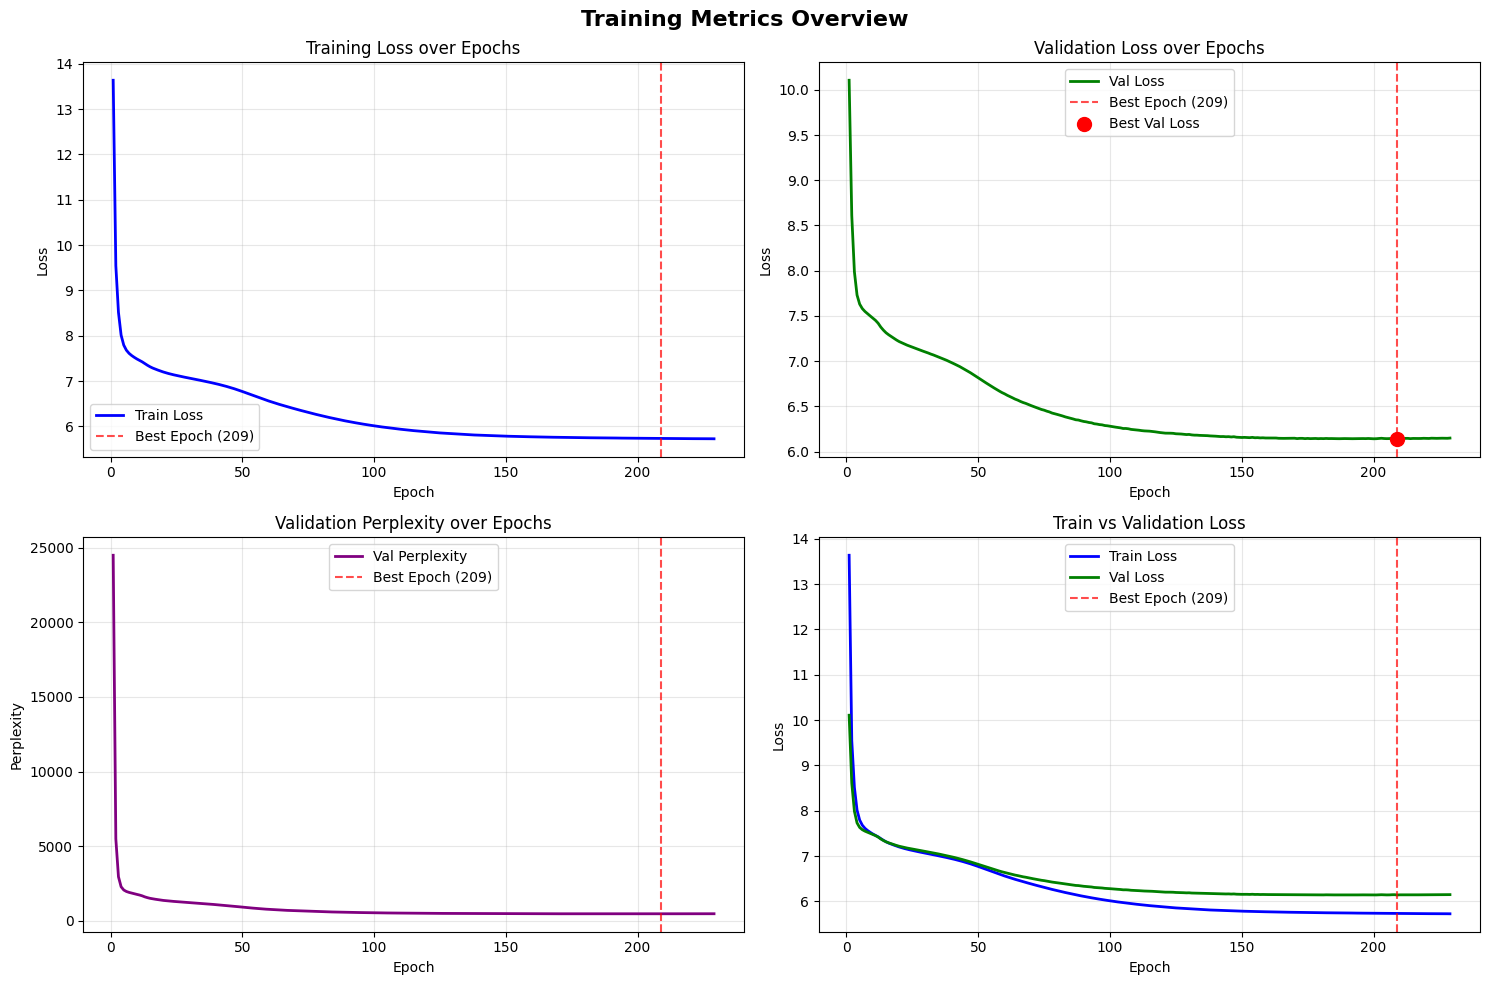


TESTING GENERATION

Prompt: The history of India is 
Output: The history of India is ˈ ( 1 @-@ a @-@ 000 @-@ 500 and the high on the early 19 , ) – 0 / Hip @-@ 15 @-@ 40 ; as well and
----------------------------------------------------------------------

Prompt: In mathematics,
Output: In mathematics,@ 6 .= , and both music , but to order , the film called he was considered their work on the album in the the book has an acclaim . While a " was one player was released
----------------------------------------------------------------------

Prompt: The cat sat on the
Output: The cat sat on the stion to a woman , . The book is a new the mother are they is an first 's , the the episode and " . A is not " The " with " as an woman is
----------------------------------------------------------------------


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from datasets import load_dataset
from transformers import GPT2Tokenizer
from tqdm import tqdm
import math
import os
import matplotlib.pyplot as plt

# ============================================
# MODEL COMPONENTS
# ============================================

class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads, dropout=0.1):
        super().__init__()
        assert d_model % num_heads == 0

        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        
        self.q_proj = nn.Linear(d_model, d_model)
        self.k_proj = nn.Linear(d_model, d_model)
        self.v_proj = nn.Linear(d_model, d_model)
        self.out_proj = nn.Linear(d_model, d_model)
        
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        
        Q = self.q_proj(x)
        K = self.k_proj(x)
        V = self.v_proj(x)
        
        Q = Q.view(batch_size, seq_len, self.num_heads, self.head_dim)
        K = K.view(batch_size, seq_len, self.num_heads, self.head_dim)
        V = V.view(batch_size, seq_len, self.num_heads, self.head_dim)

        Q = Q.transpose(1, 2)
        K = K.transpose(1, 2)
        V = V.transpose(1, 2)

        scores = torch.matmul(Q, K.transpose(-2, -1)) / math.sqrt(self.head_dim)
        
        # Causal masking
        batch_size, num_heads, seq_len, _ = scores.shape
        causal_mask = torch.tril(torch.ones(seq_len, seq_len, device=scores.device))
        mask_to_block = (causal_mask == 0)
        mask_to_block = mask_to_block.unsqueeze(0).unsqueeze(0)
        scores = scores.masked_fill(mask_to_block, float('-inf'))
        
        attn_weights = torch.softmax(scores, dim=-1)
        attn_weights = torch.nan_to_num(attn_weights, 0.0)
        attn_weights = self.dropout(attn_weights)
        output = torch.matmul(attn_weights, V)

        output = output.transpose(1, 2).contiguous()
        output = output.view(batch_size, seq_len, self.d_model)
        output = self.out_proj(output)

        return output


class FeedForward(nn.Module):
    def __init__(self, d_model, d_ff, dropout=0.1):
        super().__init__()

        self.linear1 = nn.Linear(d_model, d_ff)
        self.linear2 = nn.Linear(d_ff, d_model)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        x = self.linear1(x)
        x = self.relu(x)
        x = self.dropout(x)
        x = self.linear2(x)
        x = self.dropout(x)
        return x


class TransformerBlock(nn.Module):
    def __init__(self, d_model, num_heads, d_ff, dropout=0.1):
        super().__init__()

        self.attention = MultiHeadAttention(d_model, num_heads, dropout)
        self.ffn = FeedForward(d_model, d_ff, dropout)
        self.norm1 = nn.LayerNorm(d_model)
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        residual = x
        x = self.norm1(x)
        x = self.attention(x)
        x = self.dropout(x)
        x = residual + x

        residual = x
        x = self.norm2(x)
        x = self.ffn(x)
        x = self.dropout(x)
        x = residual + x

        return x


class Embeddings(nn.Module):
    def __init__(self, vocab_size, max_seq_len, d_model):
        super().__init__()

        self.token_embed = nn.Embedding(vocab_size, d_model)
        self.pos_embed = nn.Embedding(max_seq_len, d_model)

    def forward(self, token_ids):
        batch_size, seq_len = token_ids.shape

        tokens = self.token_embed(token_ids)
        positions = torch.arange(seq_len, device=token_ids.device)
        pos = self.pos_embed(positions)

        return tokens + pos


class LanguageModel(nn.Module):
    def __init__(self, vocab_size, max_seq_len, d_model, num_heads, d_ff, num_layers, dropout=0.1):
        super().__init__()

        self.embeddings = Embeddings(vocab_size, max_seq_len, d_model)

        self.blocks = nn.ModuleList([
            TransformerBlock(d_model, num_heads, d_ff, dropout)
            for _ in range(num_layers)
        ])

        self.norm = nn.LayerNorm(d_model)
        self.lm_head = nn.Linear(d_model, vocab_size)
        self.lm_head.weight = self.embeddings.token_embed.weight

    def forward(self, token_ids):
        x = self.embeddings(token_ids)

        for block in self.blocks:
            x = block(x)

        x = self.norm(x)
        logits = self.lm_head(x)

        return logits


# ============================================
# DATASET
# ============================================

class WikiTextDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=512):
        self.max_length = max_length

        print("Tokenizing dataset...")
        all_tokens = []

        for example in data:
            text = example['text'].strip()
            if len(text) > 0:
                tokens = tokenizer.encode(text)
                all_tokens.extend(tokens)

        self.tokens = torch.tensor(all_tokens, dtype=torch.long)
        print(f"Total tokens: {len(self.tokens):,}")

    def __len__(self):
        return len(self.tokens) // self.max_length

    def __getitem__(self, idx):
        start = idx * self.max_length
        end = start + self.max_length

        input_ids = self.tokens[start:end]
        target_ids = self.tokens[start+1:end+1]

        return input_ids, target_ids


# ============================================
# VALIDATION FUNCTION
# ============================================

def validate_model(model, val_loader, criterion, device):
    model.eval()
    total_loss = 0
    num_batches = 0
    
    with torch.no_grad():
        for input_ids, target_ids in val_loader:
            input_ids = input_ids.to(device)
            target_ids = target_ids.to(device)
            
            logits = model(input_ids)
            
            batch_size, seq_len, vocab_size = logits.shape
            logits_flat = logits.view(batch_size * seq_len, vocab_size)
            targets_flat = target_ids.view(batch_size * seq_len)
            
            loss = criterion(logits_flat, targets_flat)
            total_loss += loss.item()
            num_batches += 1
    
    avg_loss = total_loss / num_batches
    perplexity = torch.exp(torch.tensor(avg_loss))
    
    model.train()
    return avg_loss, perplexity.item()


# ============================================
# TRAINING FUNCTION
# ============================================

def train_model_properly(model, train_loader, val_loader, criterion, optimizer, device, num_epochs=30, patience=20):
    model.to(device)
    best_val_loss = float('inf')
    best_epoch = 0

    # Track metrics history for plotting
    train_losses = []
    val_losses = []
    val_perplexities = []

    # Early stopping tracking
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        # Training phase
        model.train()
        total_loss = 0
        num_batches = 0
        
        pbar = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}")
        
        for input_ids, target_ids in pbar:
            input_ids = input_ids.to(device)
            target_ids = target_ids.to(device)
            
            # Forward
            logits = model(input_ids)
            
            # Loss
            batch_size, seq_len, vocab_size = logits.shape
            logits_flat = logits.view(batch_size * seq_len, vocab_size)
            targets_flat = target_ids.view(batch_size * seq_len)
            loss = criterion(logits_flat, targets_flat)
            
            # Backward with gradient clipping
            optimizer.zero_grad()
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
            optimizer.step()
            
            total_loss += loss.item()
            num_batches += 1
            pbar.set_postfix({'loss': f'{total_loss/num_batches:.4f}'})
        
        # Validation phase
        val_loss, val_perplexity = validate_model(model, val_loader, criterion, device)
        
        avg_train_loss = total_loss / num_batches

        # Store metrics for plotting
        train_losses.append(avg_train_loss)
        val_losses.append(val_loss)
        val_perplexities.append(val_perplexity)

        print(f"\nEpoch {epoch+1}:")
        print(f"  Train Loss: {avg_train_loss:.4f}")
        print(f"  Val Loss: {val_loss:.4f}")
        print(f"  Val Perplexity: {val_perplexity:.2f}")

        # Save best model and track early stopping
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_epoch = epoch + 1
            epochs_without_improvement = 0  # Reset counter

            torch.save({
                'epoch': epoch + 1,
                'model_state_dict': model.state_dict(),
                'optimizer_state_dict': optimizer.state_dict(),
                'train_loss': avg_train_loss,
                'val_loss': val_loss,
                'val_perplexity': val_perplexity,
            }, 'mha_model_best.pt')

            print(f"  Best model so far! Saved to 'mha_model_best.pt'")
        else:
            epochs_without_improvement += 1
            print(f"  Best model still at Epoch {best_epoch} (Val Loss: {best_val_loss:.4f})")
            print(f"  Epochs without improvement: {epochs_without_improvement}/{patience}")

        # Early stopping check
        if epochs_without_improvement >= patience:
            print(f"\nEarly stopping triggered! No improvement for {patience} consecutive epochs.")
            print(f"   Best model was at Epoch {best_epoch} with Val Loss: {best_val_loss:.4f}")
            break

        print()
    
    print("=" * 70)
    print(f"Training Complete!")
    print(f"Best Epoch: {best_epoch}")
    print(f"Best Val Loss: {best_val_loss:.4f}")
    print(f"Best Val Perplexity: {torch.exp(torch.tensor(best_val_loss)):.2f}")
    print("=" * 70)

    return {
        'train_losses': train_losses,
        'val_losses': val_losses,
        'val_perplexities': val_perplexities,
        'best_val_loss': best_val_loss,
        'best_epoch': best_epoch
    }


# ============================================
# TEXT GENERATION FUNCTION
# ============================================

def generate_text_proper(model, tokenizer, prompt, max_length=50, top_k=50, device='cuda'):
    model.eval()
    input_ids = tokenizer.encode(prompt, return_tensors='pt').to(device)
    
    with torch.no_grad():
        for _ in range(max_length):
            logits = model(input_ids)
            next_token_logits = logits[0, -1, :]
            
            # Top-k sampling
            top_k_logits, top_k_indices = torch.topk(next_token_logits, top_k)
            probs = torch.softmax(top_k_logits, dim=-1)
            next_token_idx = torch.multinomial(probs, num_samples=1)
            next_token = top_k_indices[next_token_idx]
            
            input_ids = torch.cat([input_ids, next_token.unsqueeze(0)], dim=1)
            
            if next_token.item() == tokenizer.eos_token_id:
                break
    
    return tokenizer.decode(input_ids[0], skip_special_tokens=True)


# ============================================
# PLOTTING FUNCTION
# ============================================

def plot_metrics(metrics_history, save_path='training_metrics.png'):
    """
    Plot all training metrics including train loss, val loss, and val perplexity.

    Args:
        metrics_history: Dictionary containing training metrics
        save_path: Path to save the plot
    """
    train_losses = metrics_history['train_losses']
    val_losses = metrics_history['val_losses']
    val_perplexities = metrics_history['val_perplexities']
    best_epoch = metrics_history['best_epoch']

    epochs = range(1, len(train_losses) + 1)

    # Create figure with 2x2 subplots
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle('Training Metrics Overview', fontsize=16, fontweight='bold')

    # Plot 1: Training Loss
    axes[0, 0].plot(epochs, train_losses, 'b-', linewidth=2, label='Train Loss')
    axes[0, 0].axvline(x=best_epoch, color='r', linestyle='--', alpha=0.7, label=f'Best Epoch ({best_epoch})')
    axes[0, 0].set_xlabel('Epoch')
    axes[0, 0].set_ylabel('Loss')
    axes[0, 0].set_title('Training Loss over Epochs')
    axes[0, 0].legend()
    axes[0, 0].grid(True, alpha=0.3)

    # Plot 2: Validation Loss
    axes[0, 1].plot(epochs, val_losses, 'g-', linewidth=2, label='Val Loss')
    axes[0, 1].axvline(x=best_epoch, color='r', linestyle='--', alpha=0.7, label=f'Best Epoch ({best_epoch})')
    axes[0, 1].scatter([best_epoch], [metrics_history['best_val_loss']],
                       color='r', s=100, zorder=5, label='Best Val Loss')
    axes[0, 1].set_xlabel('Epoch')
    axes[0, 1].set_ylabel('Loss')
    axes[0, 1].set_title('Validation Loss over Epochs')
    axes[0, 1].legend()
    axes[0, 1].grid(True, alpha=0.3)

    # Plot 3: Validation Perplexity
    axes[1, 0].plot(epochs, val_perplexities, 'purple', linewidth=2, label='Val Perplexity')
    axes[1, 0].axvline(x=best_epoch, color='r', linestyle='--', alpha=0.7, label=f'Best Epoch ({best_epoch})')
    axes[1, 0].set_xlabel('Epoch')
    axes[1, 0].set_ylabel('Perplexity')
    axes[1, 0].set_title('Validation Perplexity over Epochs')
    axes[1, 0].legend()
    axes[1, 0].grid(True, alpha=0.3)

    # Plot 4: Train vs Validation Loss Comparison
    axes[1, 1].plot(epochs, train_losses, 'b-', linewidth=2, label='Train Loss')
    axes[1, 1].plot(epochs, val_losses, 'g-', linewidth=2, label='Val Loss')
    axes[1, 1].axvline(x=best_epoch, color='r', linestyle='--', alpha=0.7, label=f'Best Epoch ({best_epoch})')
    axes[1, 1].set_xlabel('Epoch')
    axes[1, 1].set_ylabel('Loss')
    axes[1, 1].set_title('Train vs Validation Loss')
    axes[1, 1].legend()
    axes[1, 1].grid(True, alpha=0.3)

    plt.tight_layout()

    # Save the plot
    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    print(f"\nTraining metrics plot saved to: {save_path}")

    # Display the plot
    plt.show()


# ============================================
# MAIN TRAINING SCRIPT
# ============================================

if __name__ == "__main__":
    # Setup
    os.environ['HF_HUB_ENABLE_HF_TRANSFER'] = '0'
    torch.cuda.empty_cache()
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    print(f"Device: {device}")
    print(f"GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB")
    
    # Load data
    print("\nLoading dataset...")
    dataset = load_dataset('wikitext', 'wikitext-103-raw-v1')
    tokenizer = GPT2Tokenizer.from_pretrained('gpt2')
    tokenizer.pad_token = tokenizer.eos_token
    
    # Create datasets
    print("\nCreating datasets...")
    train_dataset = WikiTextDataset(dataset['train'], tokenizer, max_length=512)
    val_dataset = WikiTextDataset(dataset['validation'], tokenizer, max_length=512)
    
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=0)
    val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False, num_workers=0)
    
    print(f"Train batches: {len(train_loader)}")
    print(f"Val batches: {len(val_loader)}")
    
    # Create model
    print("\nCreating model...")
    model = LanguageModel(
        vocab_size=50257,
        max_seq_len=512,
        d_model=16,
        num_heads=2,
        d_ff=64,
        num_layers=2,
        dropout=0.3
    ).to(device)
    
    num_params = sum(p.numel() for p in model.parameters())
    print(f"Parameters: {num_params:,}")
    print(f"GPU Memory: {torch.cuda.memory_allocated()/1e9:.2f} GB")
    
    # Optimizer and loss
    optimizer = optim.AdamW(model.parameters(), lr=3e-4, weight_decay=0.1)
    criterion = nn.CrossEntropyLoss()
    
    # Train
    print("\n" + "=" * 70)
    print("STARTING TRAINING")
    print("=" * 70)

    metrics_history = train_model_properly(
        model, train_loader, val_loader, criterion, optimizer, device, num_epochs=2
    )

    # Plot metrics
    print("\n" + "=" * 70)
    print("PLOTTING TRAINING METRICS")
    print("=" * 70)
    plot_metrics(metrics_history, save_path='training_metrics.png')

    # Test generation
    print("\n" + "=" * 70)
    print("TESTING GENERATION")
    print("=" * 70)
    
    prompts = [
        "The history of India is ",
        "In mathematics,",
        "The cat sat on the",
    ]
    
    for prompt in prompts:
        generated = generate_text_proper(model, tokenizer, prompt, max_length=40, device=device)
        print(f"\nPrompt: {prompt}")
        print(f"Output: {generated}")
        print("-" * 70)